## 0. Import Libraries

In [2]:
import sys 
import time
import matplotlib

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

from IPython.display import clear_output

import warnings
warnings.simplefilter('ignore')

## 1. General Options

In [3]:
# bias algorithm
bias_algo = 'QDM'

# general data path
path_general = fr'/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data'

# variable name
name_variable_cosmo = 'TOT_PREC'

# saving path (saving with cosmo var name for both era5 and cosmo)
path_save = fr'{path_general}/data/{name_variable_cosmo}/'

### 1.1 Functions

In [17]:
def return_unique_options(season, time_resample):
    
    # path for resampling information
    if time_resample != 1:
        path_resample = fr'{time_resample}hrsum'
    else:
        path_resample = fr'{time_resample}hr'
        
    return season, time_resample, path_resample

def plot_indices(data, cmap, indice_name, time_frame):
    
    if time_frame == '208101_210012':
        pad = 0.1
    
    elif time_frame == '198501_200512':
        pad = -0.1
        
    p = data.plot.pcolormesh(x='rlon', 
                             y='rlat',
                             col='year',
                             col_wrap=5,
                             robust=True,
                             cmap=cmap,
                             add_colorbar=True,
                             cbar_kwargs={
                                 'location':'bottom',
                                 'shrink':0.4,
                                 'pad':pad,
                                 'label':indice_name
                             },
                             vmin=0
                            )
    return p

In [5]:
turkey_bool = xr.open_dataset(fr"{path_save}/cosmo/BC/vectorized_turkey.nc")

## 2. Visualize Data

### 2.1 Intensity Indices

In [6]:
cmap_intensity = matplotlib.colors.LinearSegmentedColormap.from_list('Random gradient 3918', (
    # Edit this gradient at https://eltos.github.io/gradient/#Random%20gradient%203918=902E4F-994D25-BE8A00-B2BE00-6CA519-265498
    (0.000, (0.565, 0.180, 0.310)),
    (0.200, (0.600, 0.302, 0.145)),
    (0.400, (0.745, 0.541, 0.000)),
    (0.600, (0.698, 0.745, 0.000)),
    (0.800, (0.424, 0.647, 0.098)),
    (1.000, (0.149, 0.329, 0.596))))

#### 2.1.1 Reference

##### 2.1.1.1 DJF

In [7]:
# uique options
season, time_resample, path_resample = return_unique_options('DJF', 1)
indice_name = fr'rx{time_resample}hr'
time_frame = '198501_200512' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
intensity_idx_cosmo = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

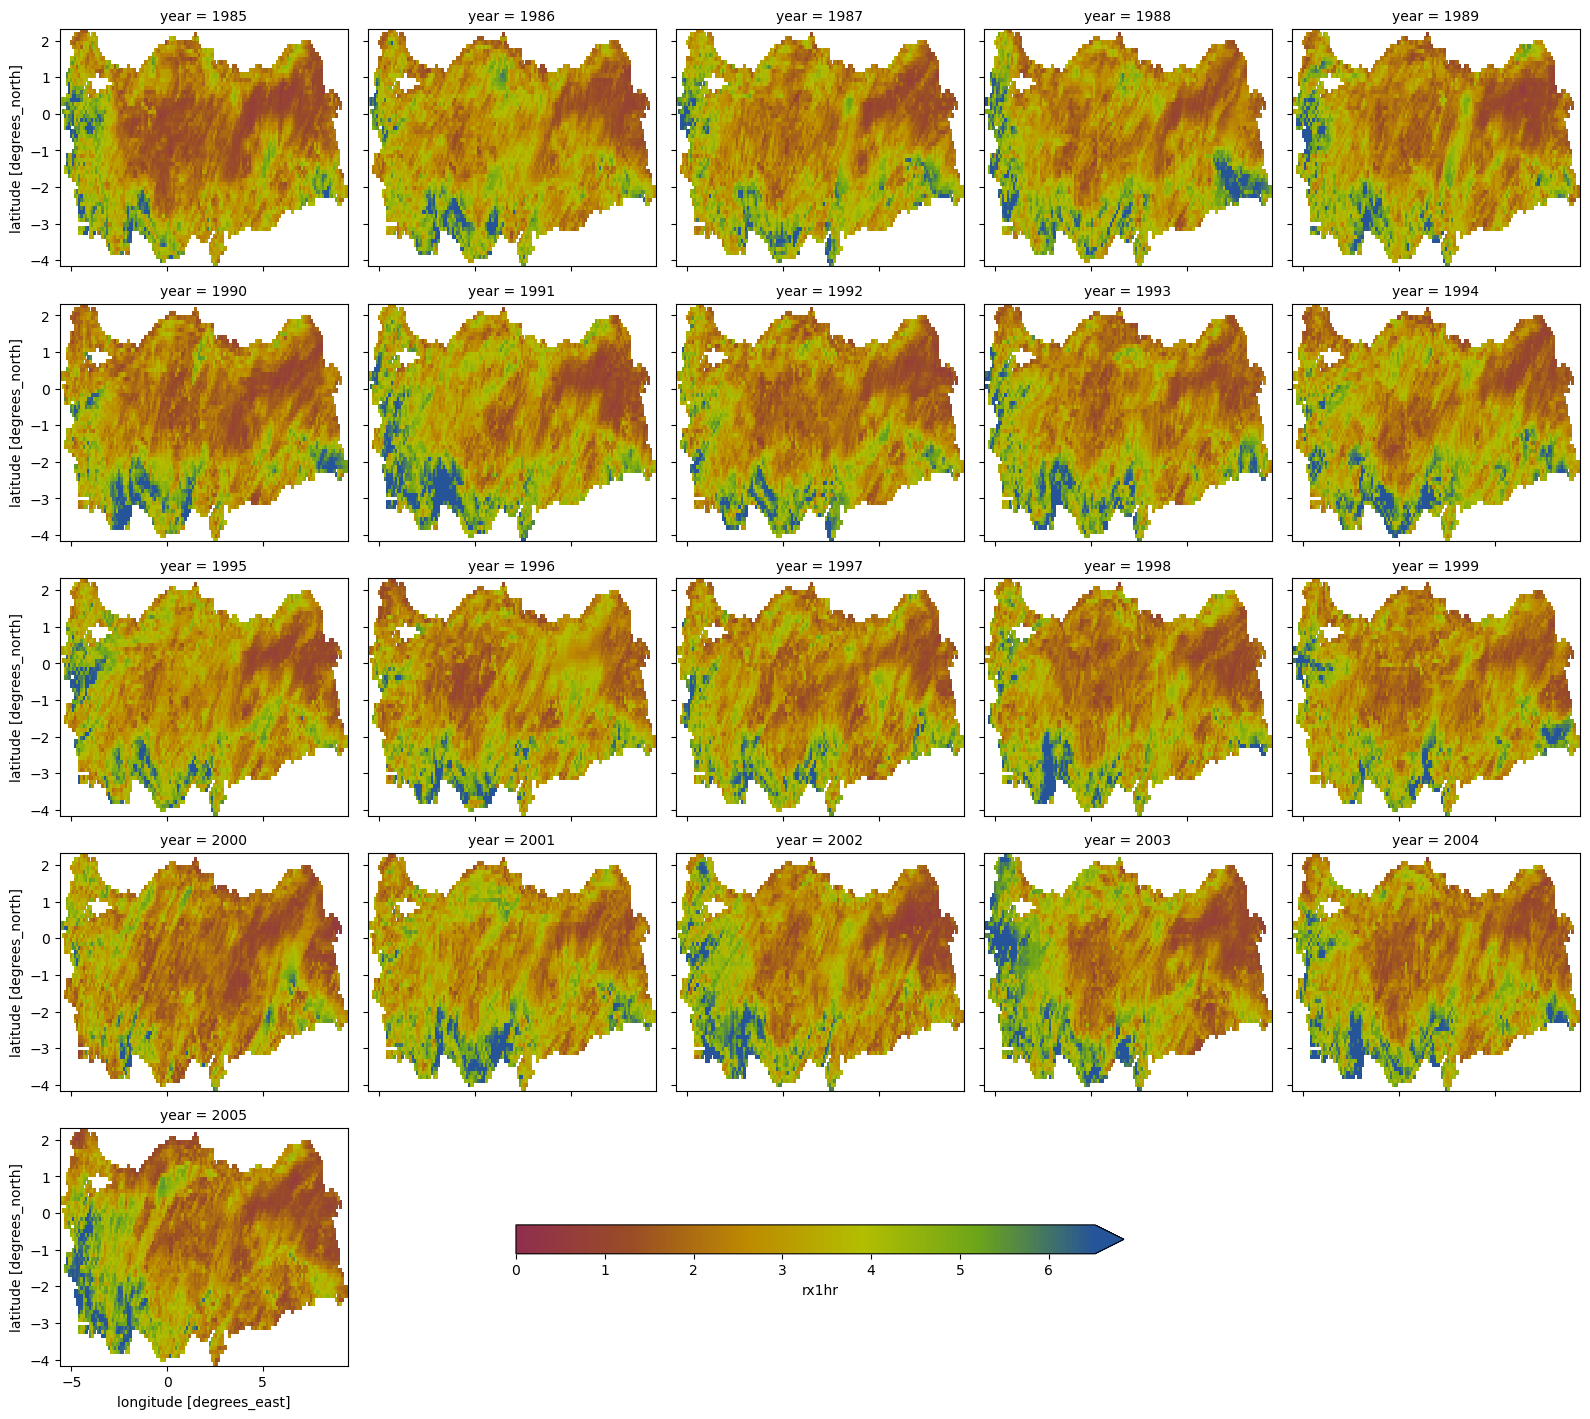

In [8]:
plot_indices(intensity_idx_cosmo, cmap_intensity, indice_name)

##### 2.1.1.2 JJA

In [9]:
# uique options
season, time_resample, path_resample = return_unique_options('JJA', 1)
indice_name = fr'rx{time_resample}hr'
time_frame = '198501_200512' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
intensity_idx_cosmo = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

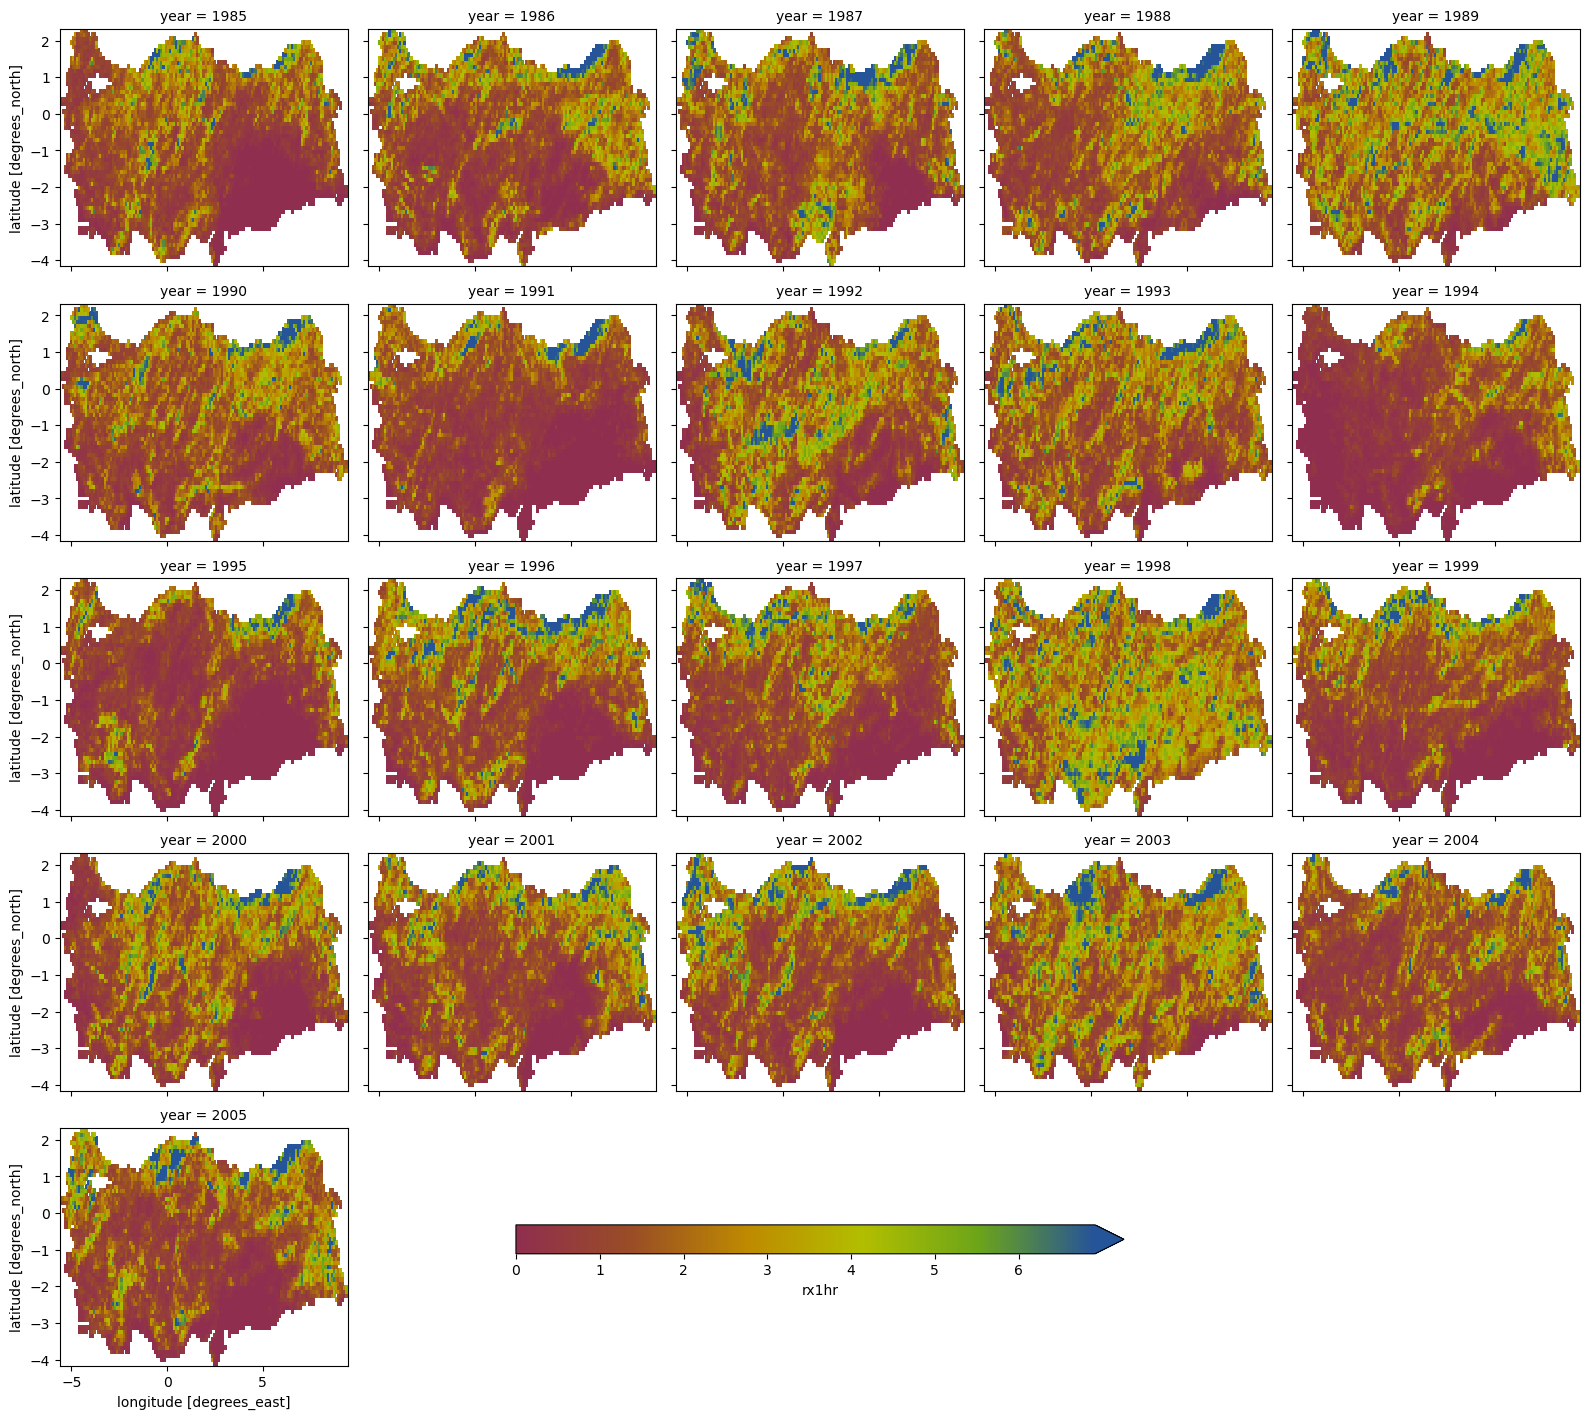

In [10]:
plot_indices(intensity_idx_cosmo, cmap_intensity, indice_name)

#### 2.1.2 Projection

##### 2.1.2.1 DJF

In [11]:
# uique options
season, time_resample, path_resample = return_unique_options('DJF', 1)
indice_name = fr'rx{time_resample}hr'
time_frame = '208101_210012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
intensity_idx_cosmo = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

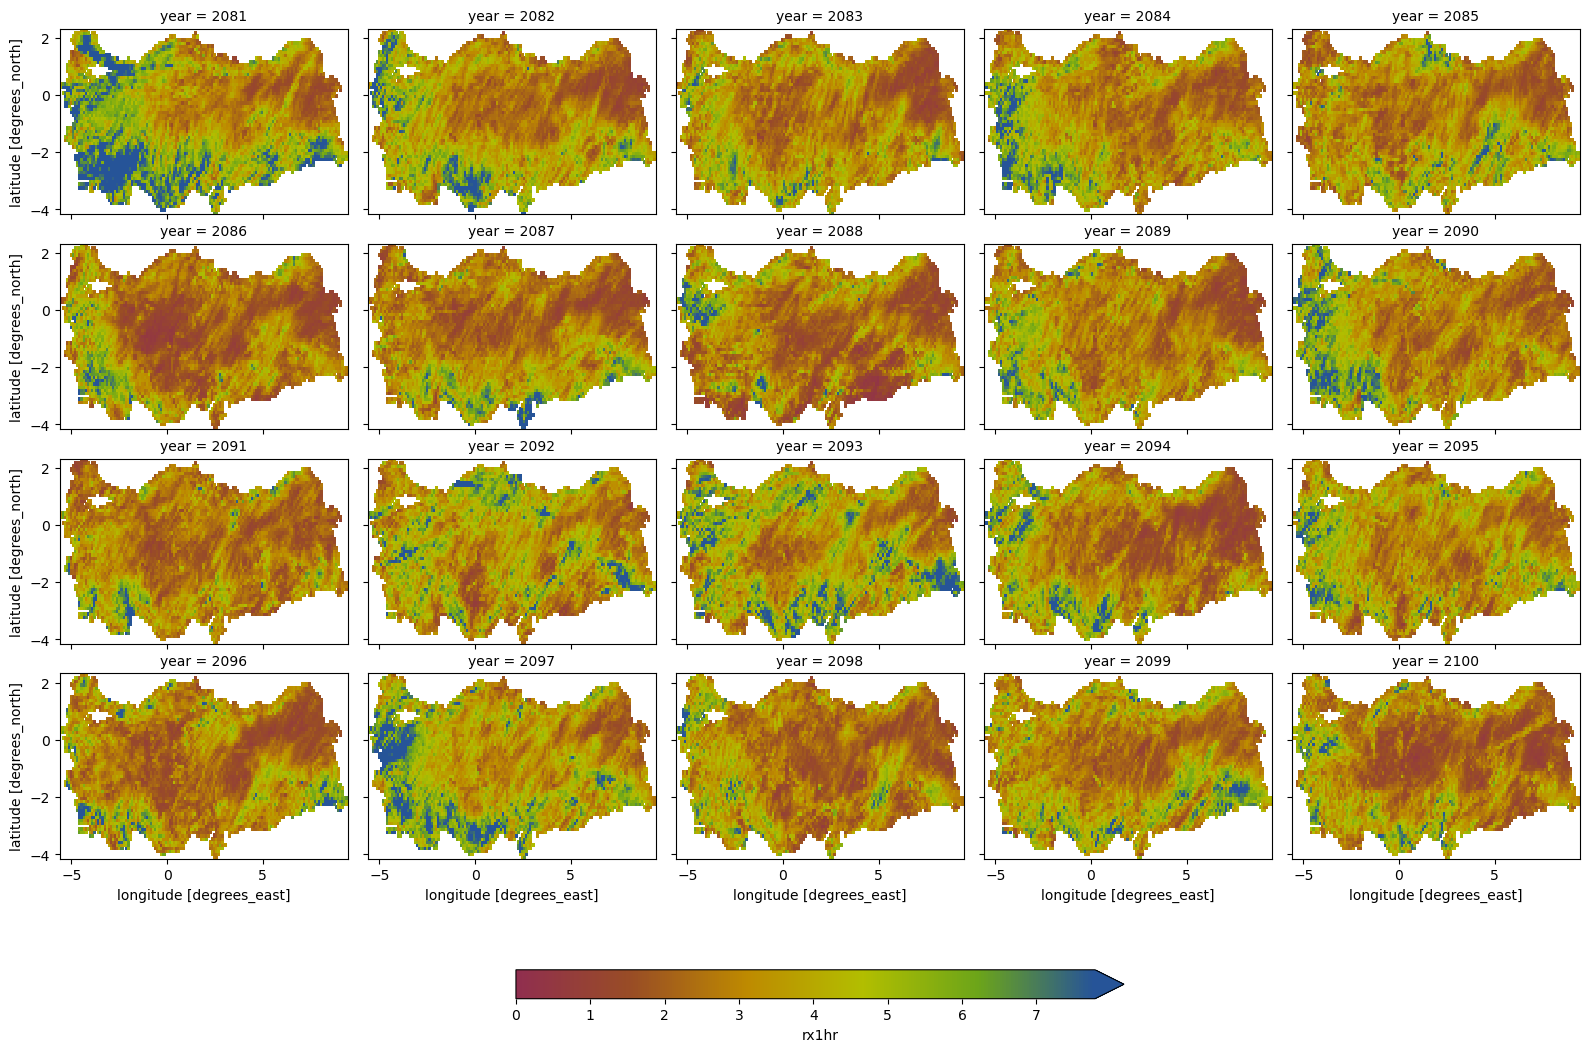

In [18]:
plot_indices(intensity_idx_cosmo, cmap_intensity, indice_name, time_frame)

##### 2.1.2.2 JJA

In [19]:
# uique options
season, time_resample, path_resample = return_unique_options('JJA', 1)
indice_name = fr'rx{time_resample}hr'
time_frame = '208101_210012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
intensity_idx_cosmo = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

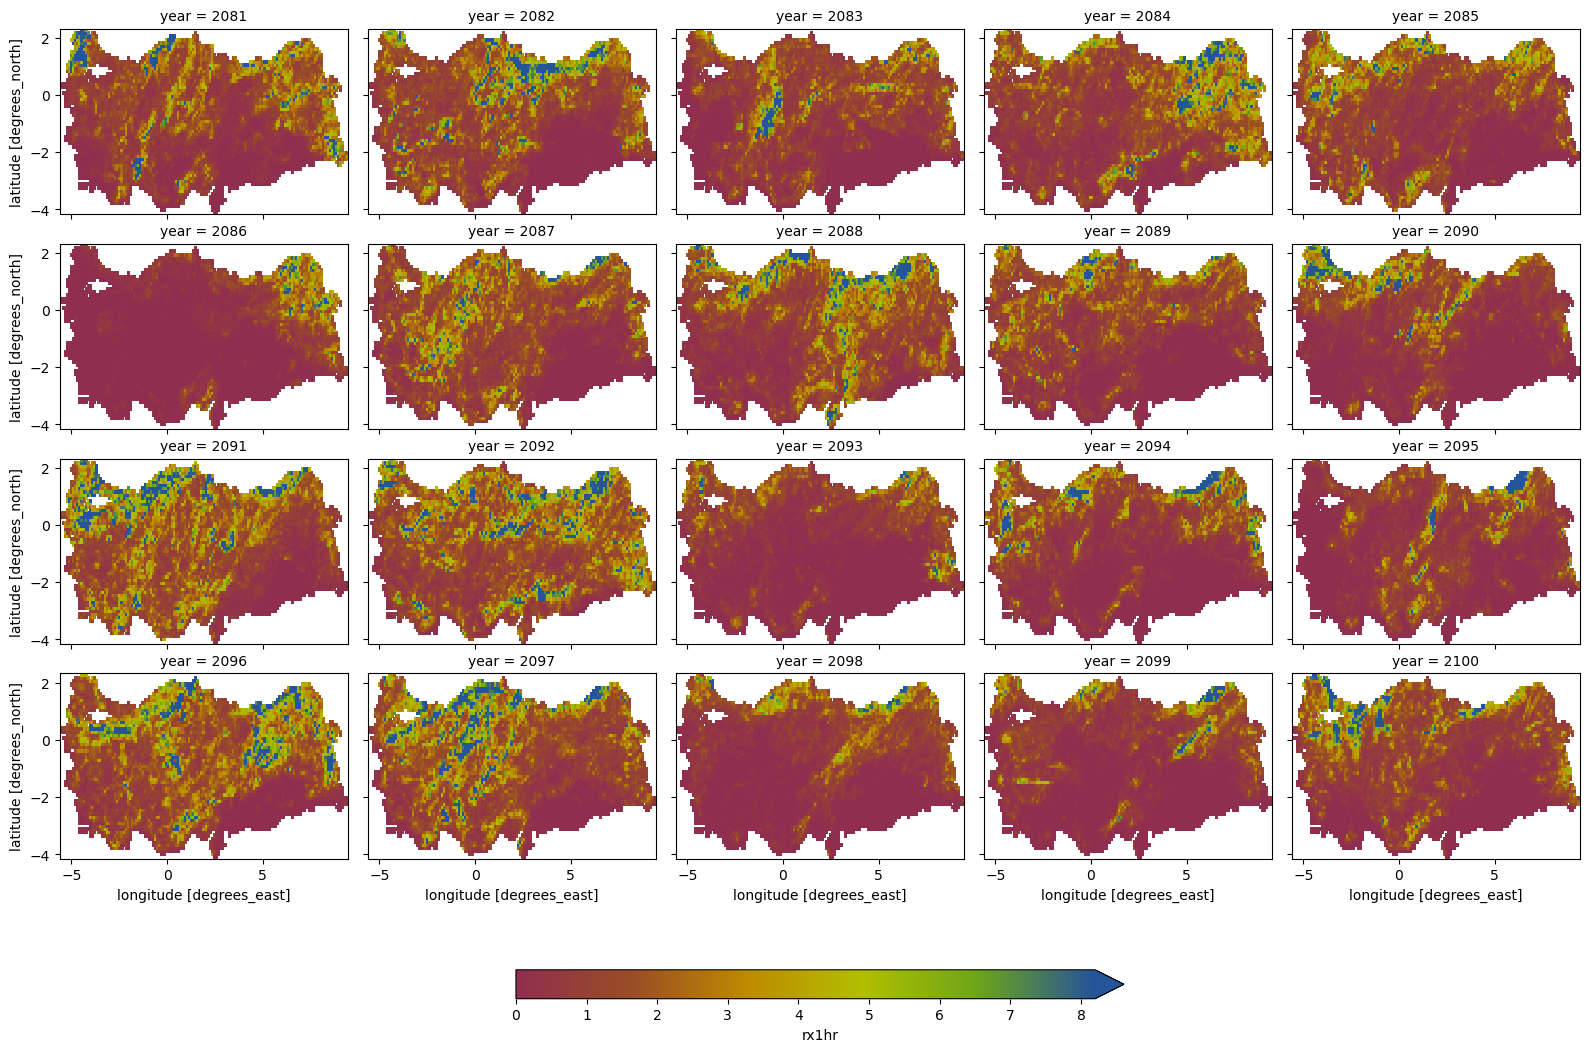

In [21]:
plot_indices(intensity_idx_cosmo, cmap_intensity, indice_name, time_frame)

### 2.2 Frequency - Percentile Indices

#### 2.2.1 Reference

In [23]:
cmap_absolute = matplotlib.colors.LinearSegmentedColormap.from_list('Random gradient 9211', (
    # Edit this gradient at https://eltos.github.io/gradient/#Random%20gradient%209211=B8790C-75B80C-00A662-008C8A-00689D-392D9B
    (0.000, (0.722, 0.475, 0.047)),
    (0.200, (0.459, 0.722, 0.047)),
    (0.400, (0.000, 0.651, 0.384)),
    (0.600, (0.000, 0.549, 0.541)),
    (0.800, (0.000, 0.408, 0.616)),
    (1.000, (0.224, 0.176, 0.608))))

##### 2.2.1.1 DJF

In [24]:
# uique options
season, time_resample, path_resample = return_unique_options('DJF', 1)
indice_name = fr'R{time_resample}hr0.95P'
time_frame = '198501_200512' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
intensity_idx_cosmo = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

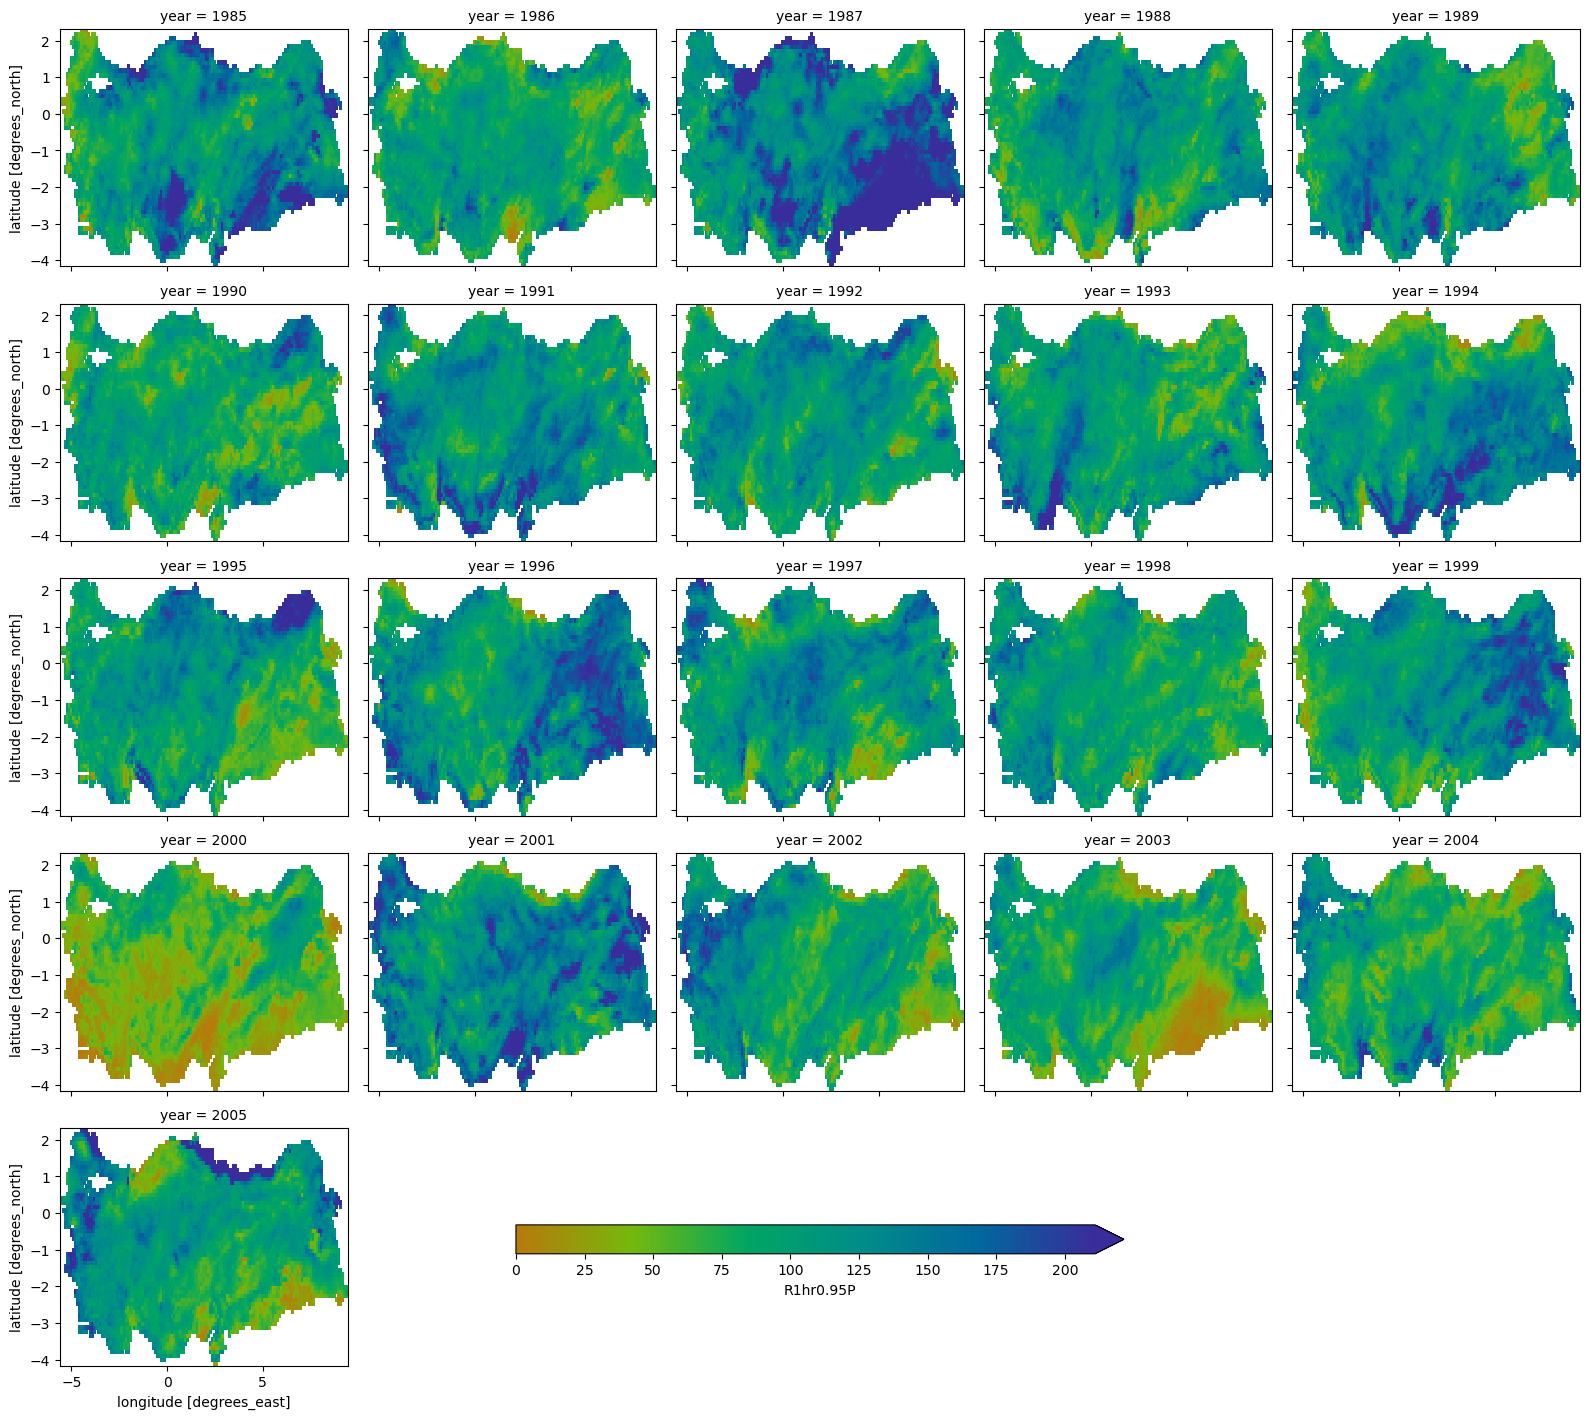

In [26]:
plot_indices(intensity_idx_cosmo, cmap_absolute, indice_name, time_frame)

##### 2.2.1.2 JJA

In [27]:
# uique options
season, time_resample, path_resample = return_unique_options('JJA', 1)
indice_name = fr'R{time_resample}hr0.95P'
time_frame = '198501_200512' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
intensity_idx_cosmo = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

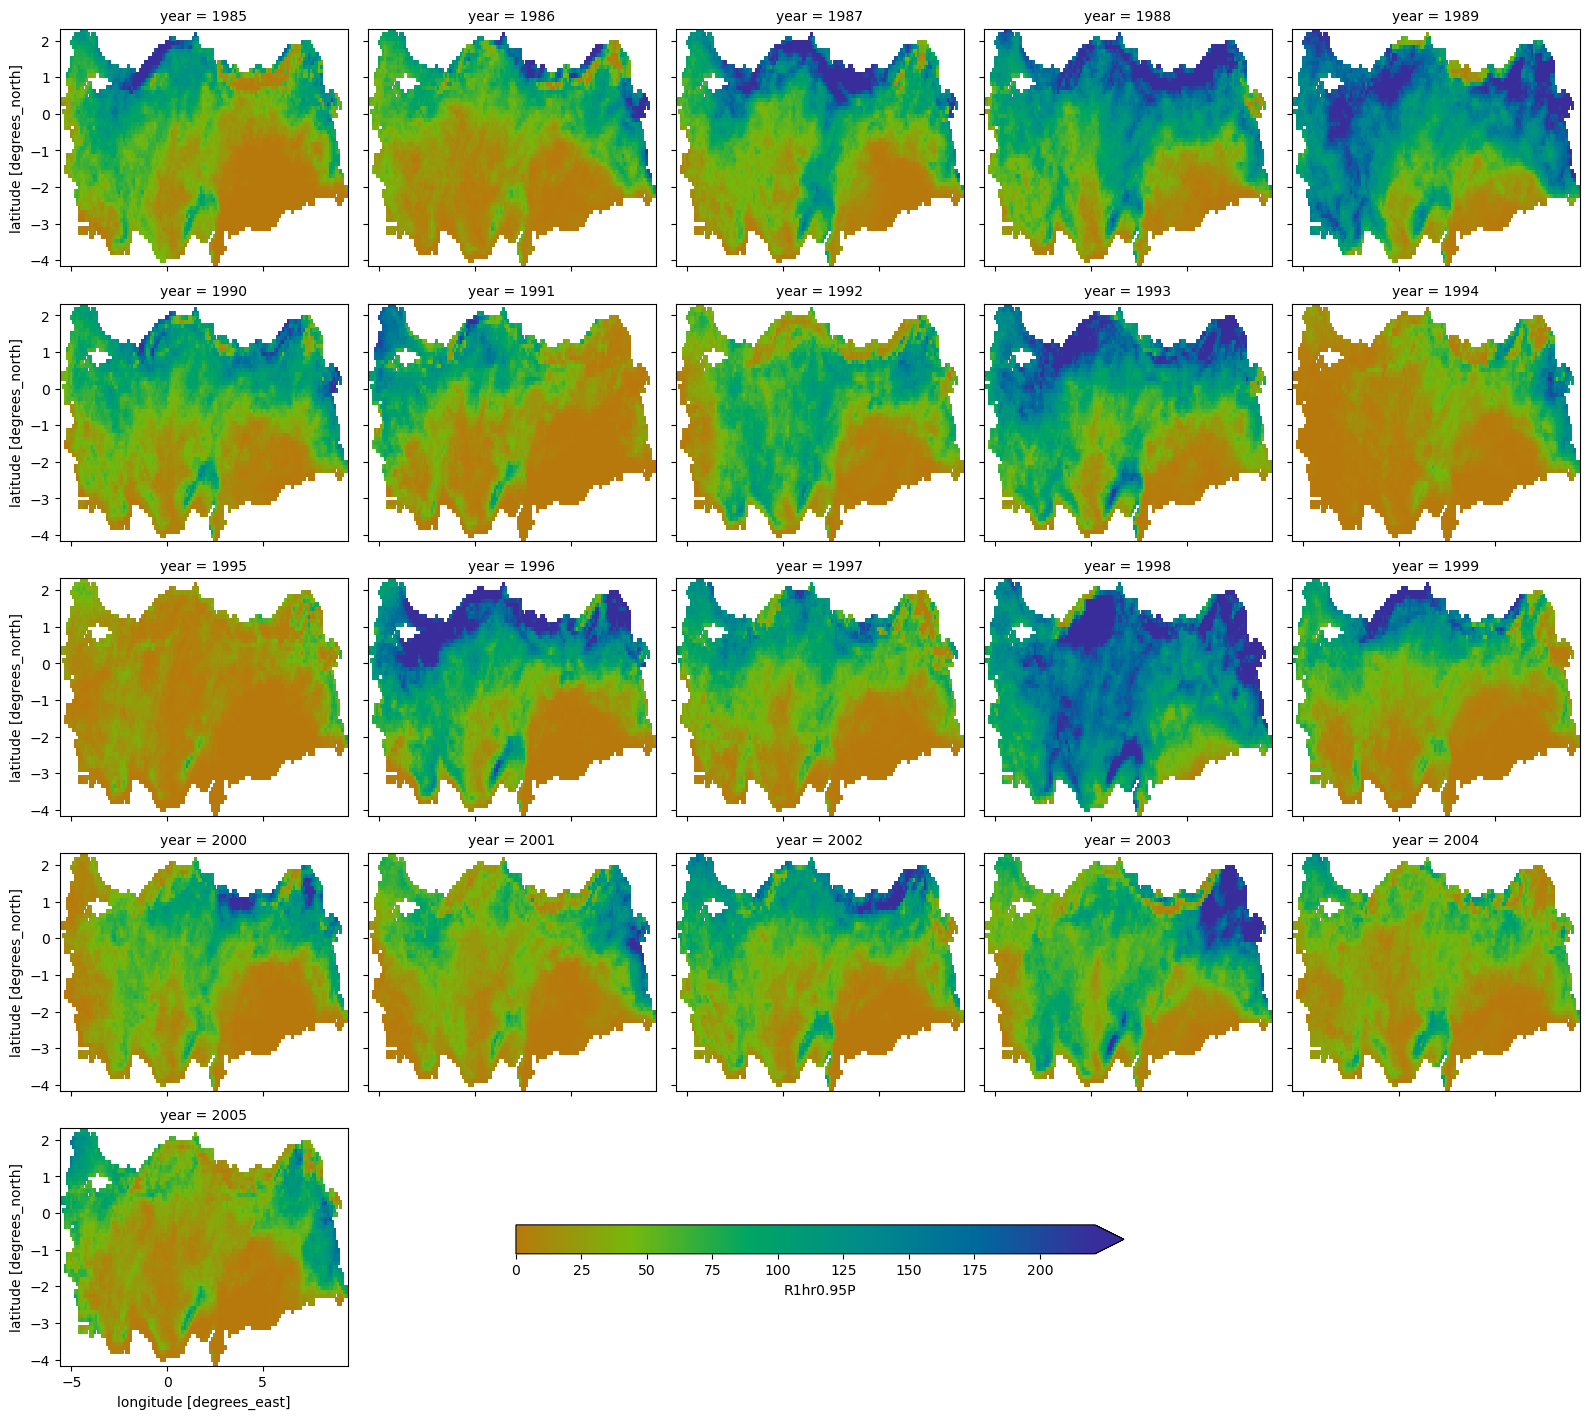

In [28]:
plot_indices(intensity_idx_cosmo, cmap_absolute, indice_name, time_frame)

#### 2.2.2 Projection

In [29]:
cmap_absolute = matplotlib.colors.LinearSegmentedColormap.from_list('Random gradient 9211', (
    # Edit this gradient at https://eltos.github.io/gradient/#Random%20gradient%209211=B8790C-75B80C-00A662-008C8A-00689D-392D9B
    (0.000, (0.722, 0.475, 0.047)),
    (0.200, (0.459, 0.722, 0.047)),
    (0.400, (0.000, 0.651, 0.384)),
    (0.600, (0.000, 0.549, 0.541)),
    (0.800, (0.000, 0.408, 0.616)),
    (1.000, (0.224, 0.176, 0.608))))

##### 2.2.2.1 DJF

In [30]:
# uique options
season, time_resample, path_resample = return_unique_options('DJF', 1)
indice_name = fr'R{time_resample}hr0.95P'
time_frame = '208101_210012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
intensity_idx_cosmo = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

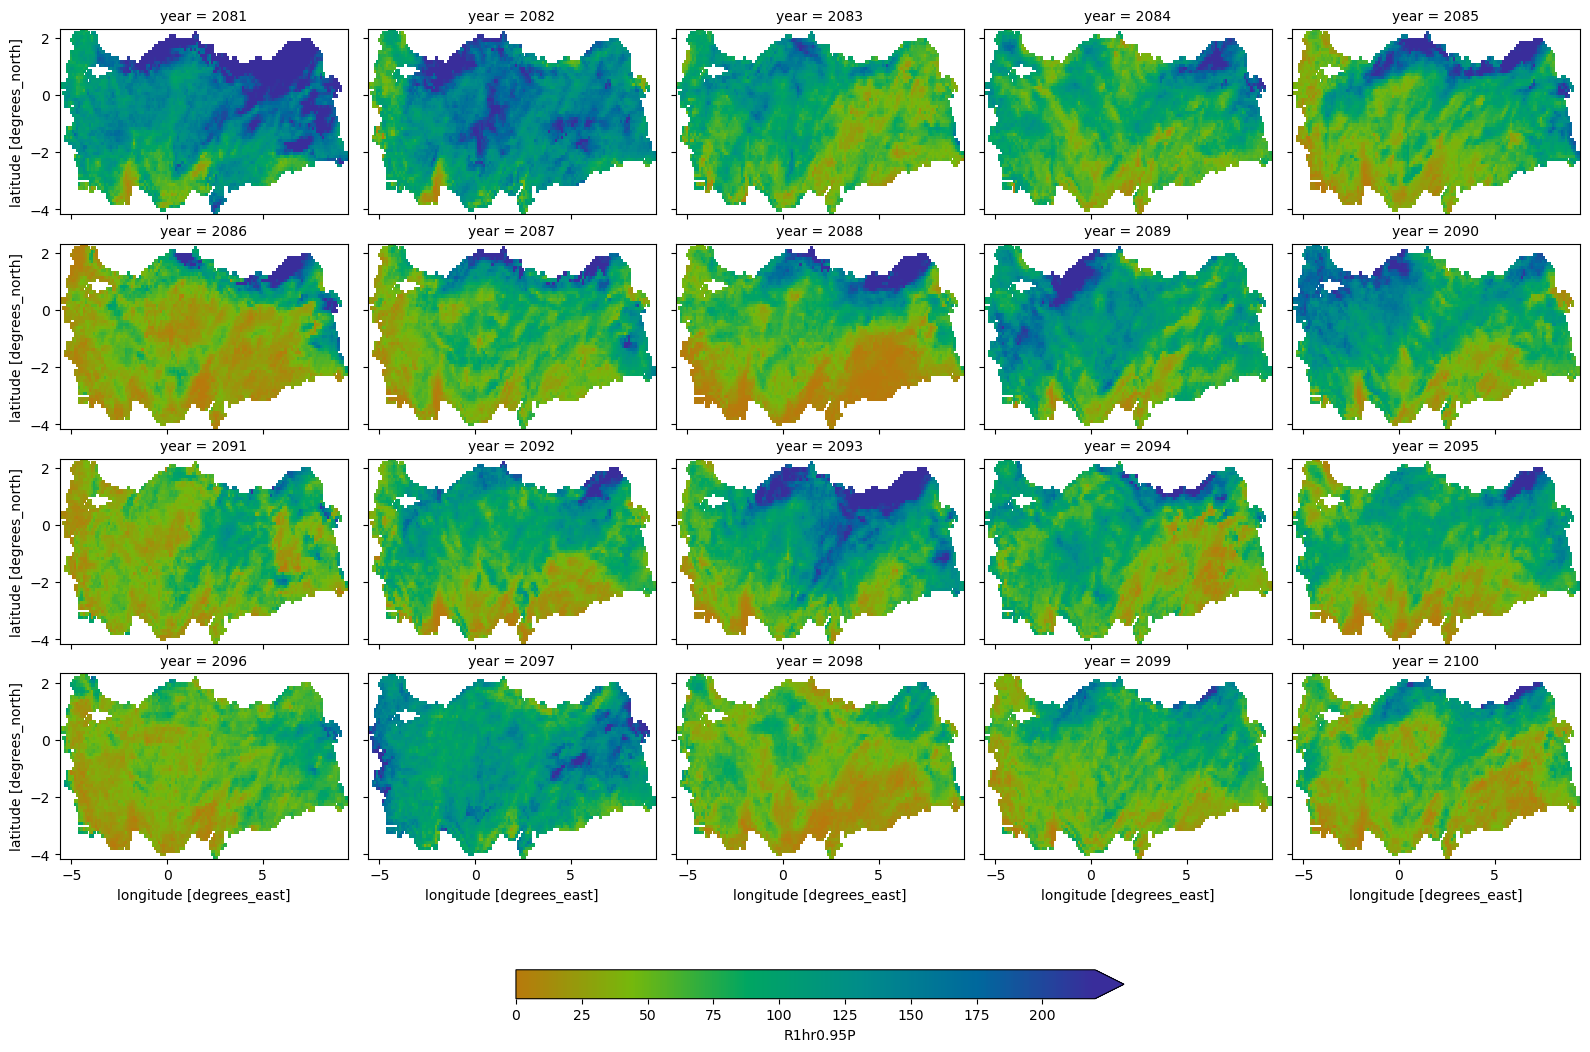

In [31]:
plot_indices(intensity_idx_cosmo, cmap_absolute, indice_name, time_frame)

##### 2.2.2.2 JJA

In [32]:
# uique options
season, time_resample, path_resample = return_unique_options('JJA', 1)
indice_name = fr'R{time_resample}hr0.95P'
time_frame = '208101_210012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
intensity_idx_cosmo = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

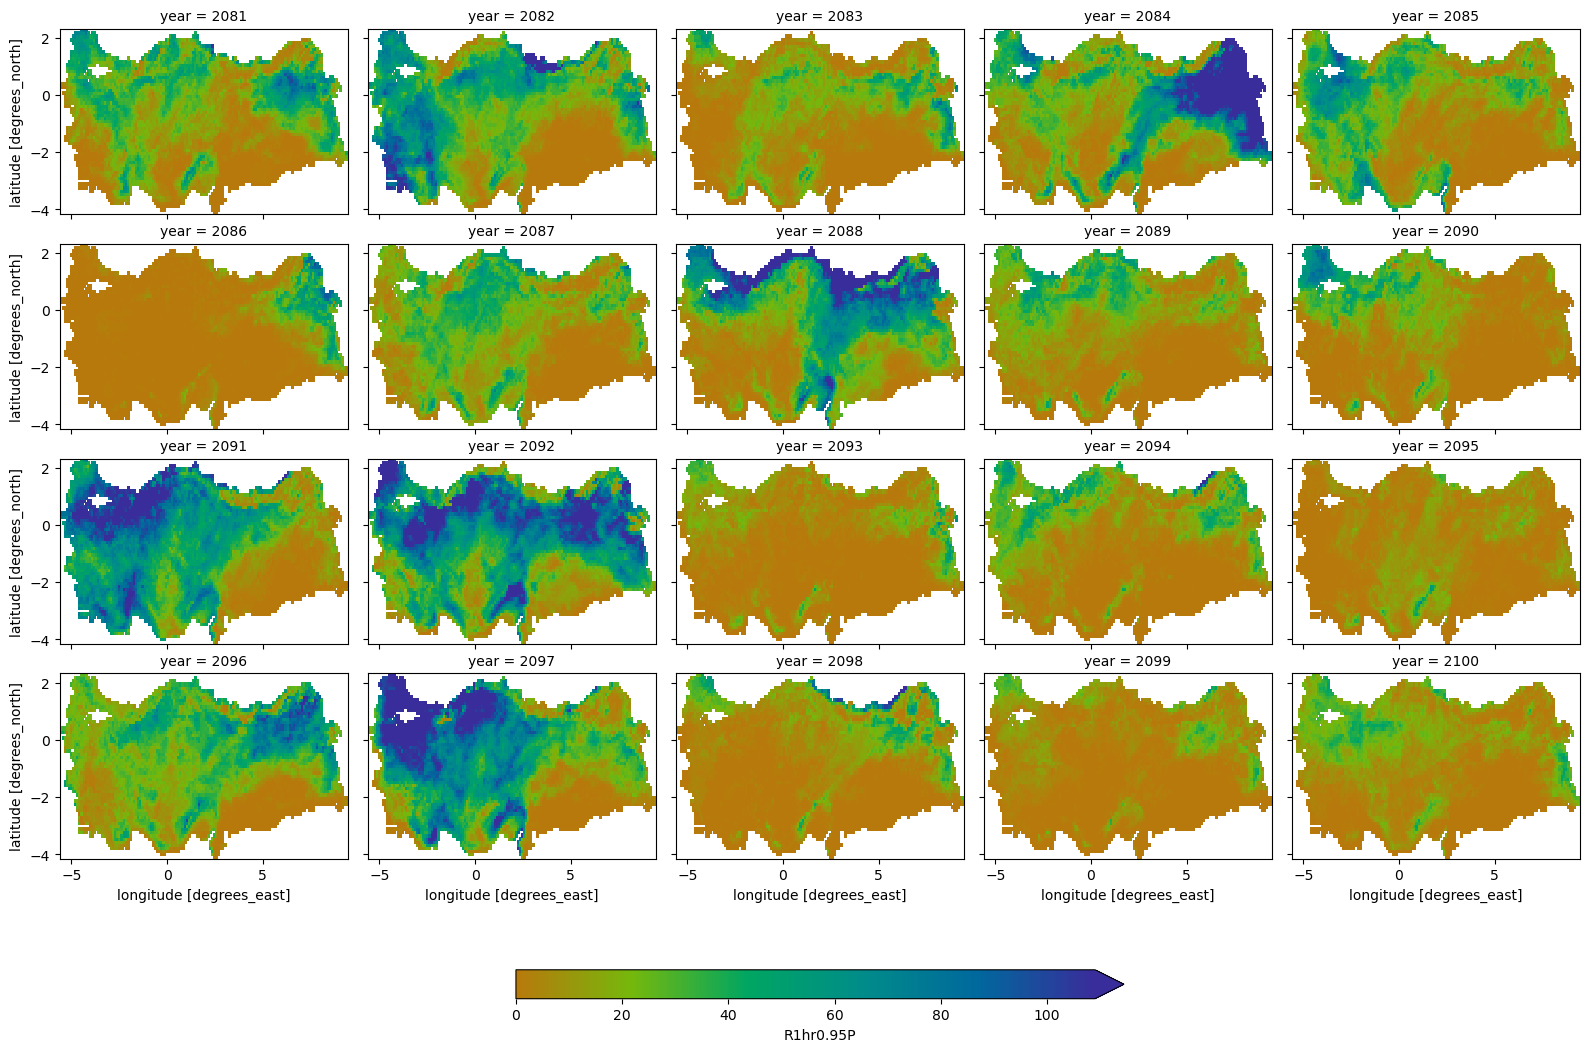

In [33]:
plot_indices(intensity_idx_cosmo, cmap_absolute, indice_name, time_frame)

### 2.3 Frequency - Absolute Indices

#### 2.3.1 Reference

In [34]:
cmap_absolute = matplotlib.colors.LinearSegmentedColormap.from_list('Random gradient 9211', (
    # Edit this gradient at https://eltos.github.io/gradient/#Random%20gradient%209211=B8790C-75B80C-00A662-008C8A-00689D-392D9B
    (0.000, (0.722, 0.475, 0.047)),
    (0.200, (0.459, 0.722, 0.047)),
    (0.400, (0.000, 0.651, 0.384)),
    (0.600, (0.000, 0.549, 0.541)),
    (0.800, (0.000, 0.408, 0.616)),
    (1.000, (0.224, 0.176, 0.608))))

##### 2.3.1.1 DJF

In [10]:
# uique options
season, time_resample, path_resample = return_unique_options('DJF', 1)
heavy_rain = 4 * time_resample # 4mm times the resample period
indice_name = fr'R{time_resample}hr{heavy_rain}mm'
time_frame = '198501_200512' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
intensity_idx_cosmo = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

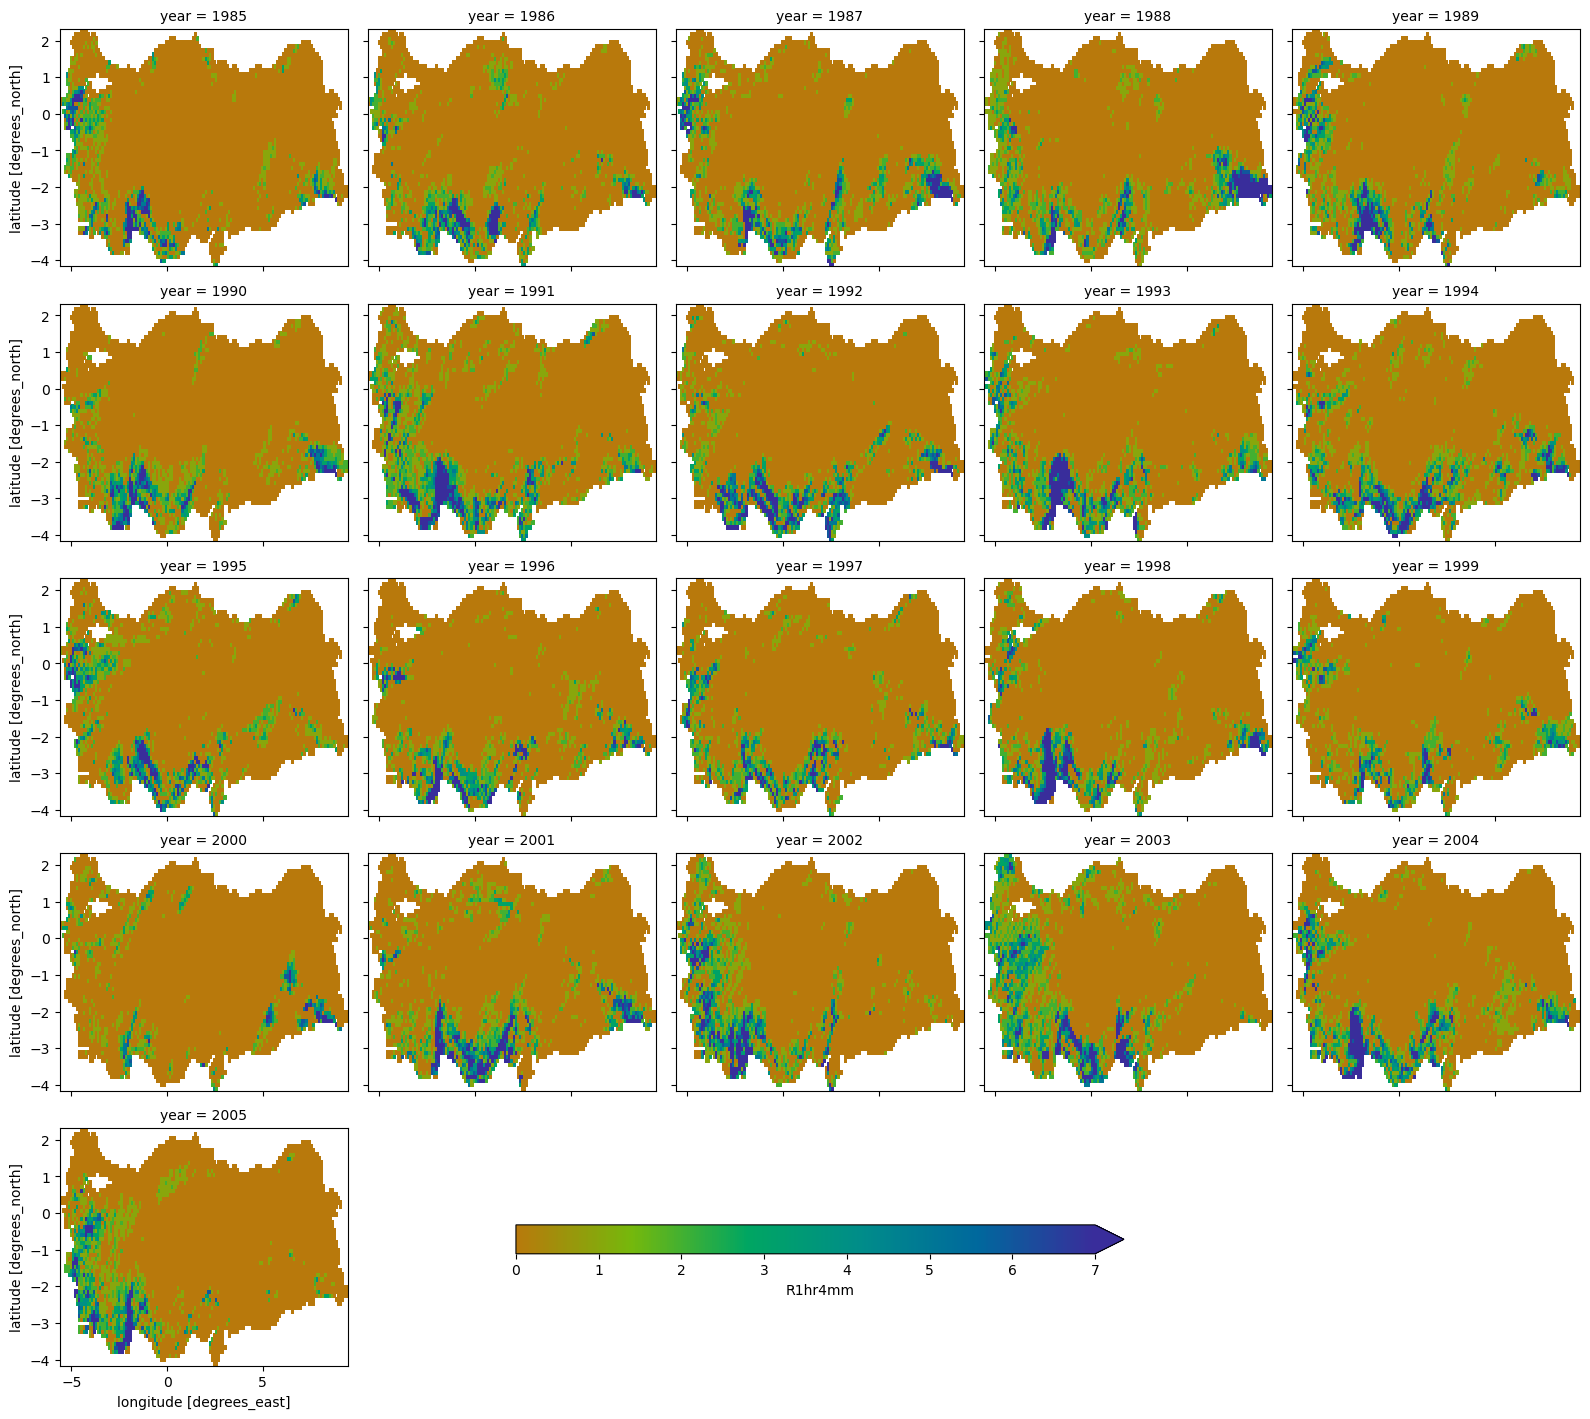

In [11]:
plot_indices(intensity_idx_cosmo, cmap_absolute, indice_name, time_frame)

##### 2.3.1.2 JJA

In [16]:
# uique options
season, time_resample, path_resample = return_unique_options('JJA', 1)
heavy_rain = 4 * time_resample # 4mm times the resample period
indice_name = fr'R{time_resample}hr{heavy_rain}mm'
time_frame = '198501_200512' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
intensity_idx_cosmo = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

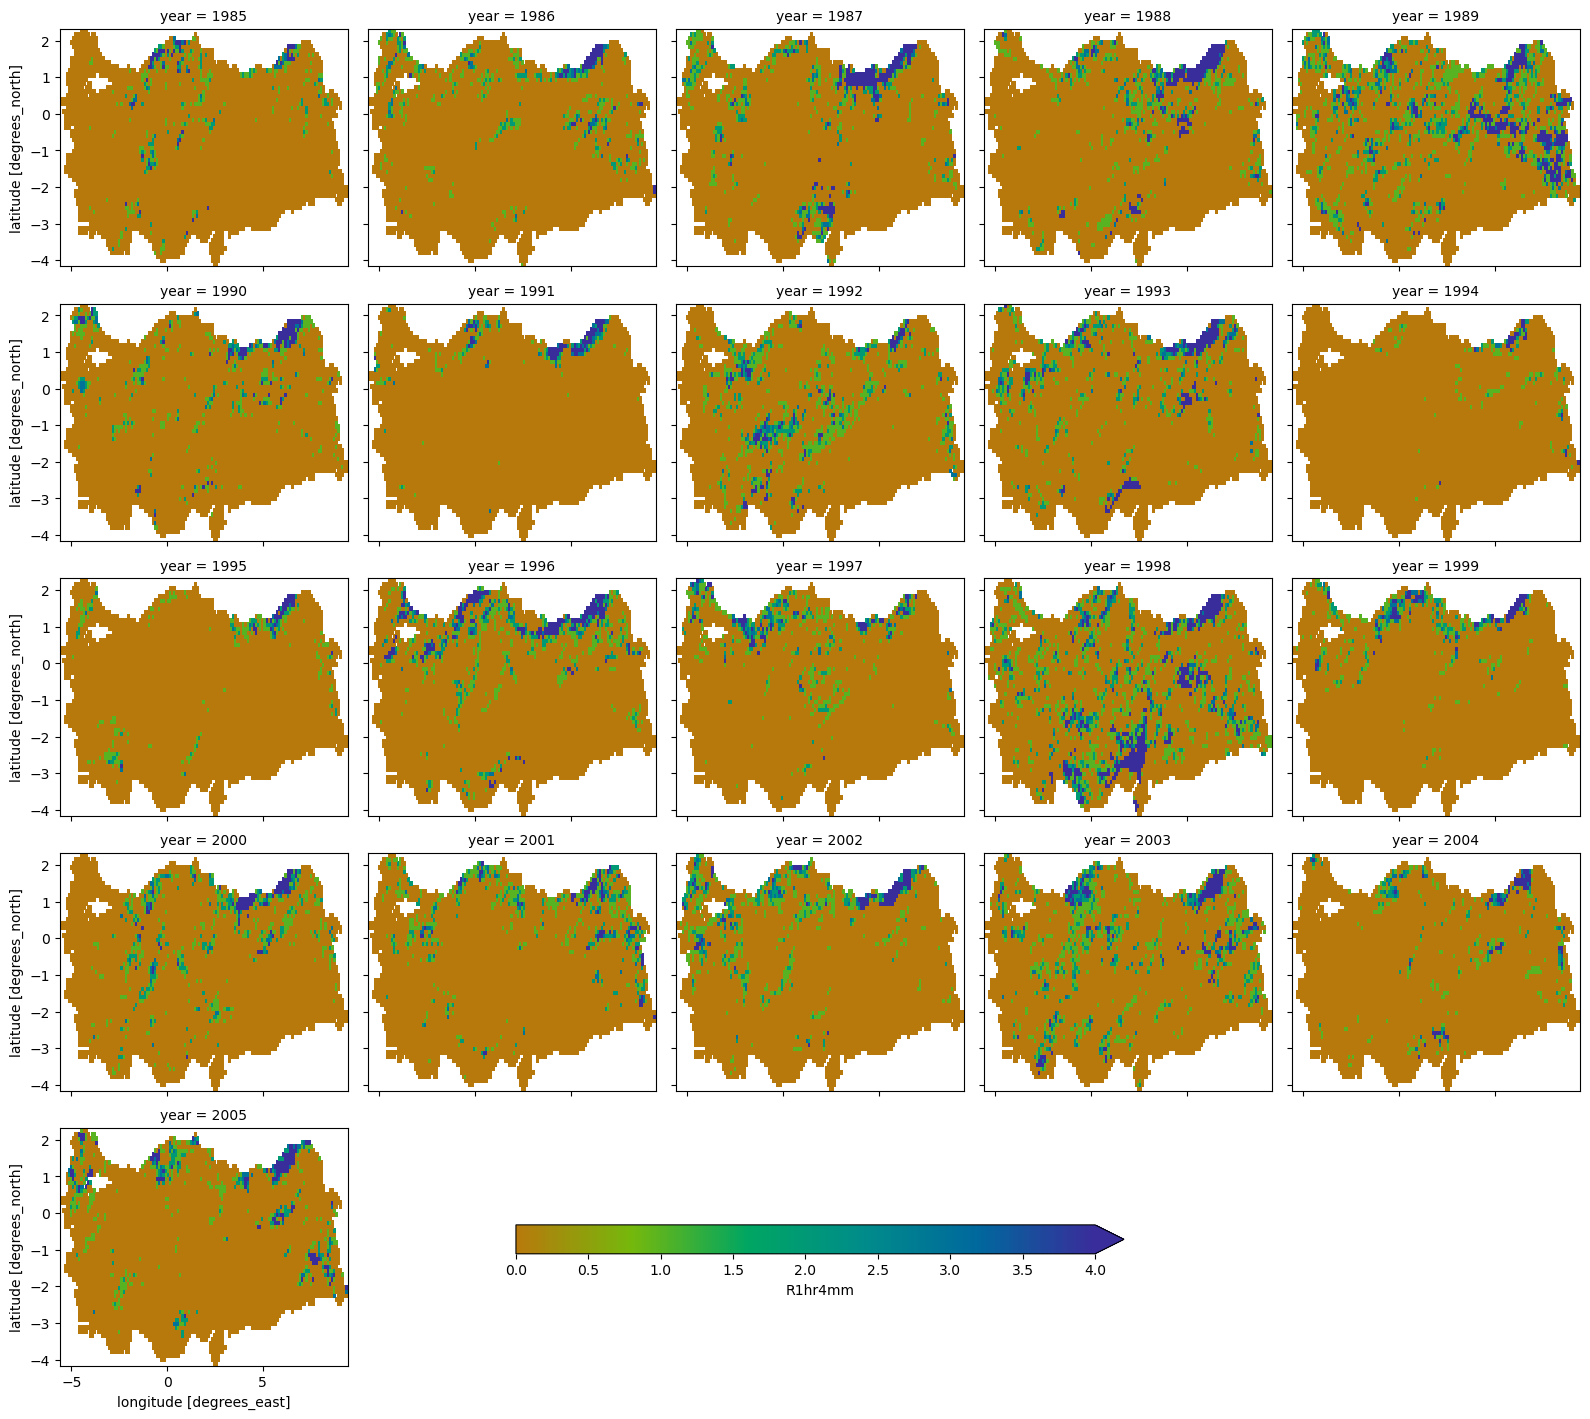

In [17]:
plot_indices(intensity_idx_cosmo, cmap_absolute, indice_name, time_frame)

#### 2.3.2 Projection

In [34]:
cmap_absolute = matplotlib.colors.LinearSegmentedColormap.from_list('Random gradient 9211', (
    # Edit this gradient at https://eltos.github.io/gradient/#Random%20gradient%209211=B8790C-75B80C-00A662-008C8A-00689D-392D9B
    (0.000, (0.722, 0.475, 0.047)),
    (0.200, (0.459, 0.722, 0.047)),
    (0.400, (0.000, 0.651, 0.384)),
    (0.600, (0.000, 0.549, 0.541)),
    (0.800, (0.000, 0.408, 0.616)),
    (1.000, (0.224, 0.176, 0.608))))

##### 2.3.2.1 DJF

In [10]:
# uique options
season, time_resample, path_resample = return_unique_options('DJF', 1)
heavy_rain = 4 * time_resample # 4mm times the resample period
indice_name = fr'R{time_resample}hr{heavy_rain}mm'
time_frame = '208101_210012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
intensity_idx_cosmo = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

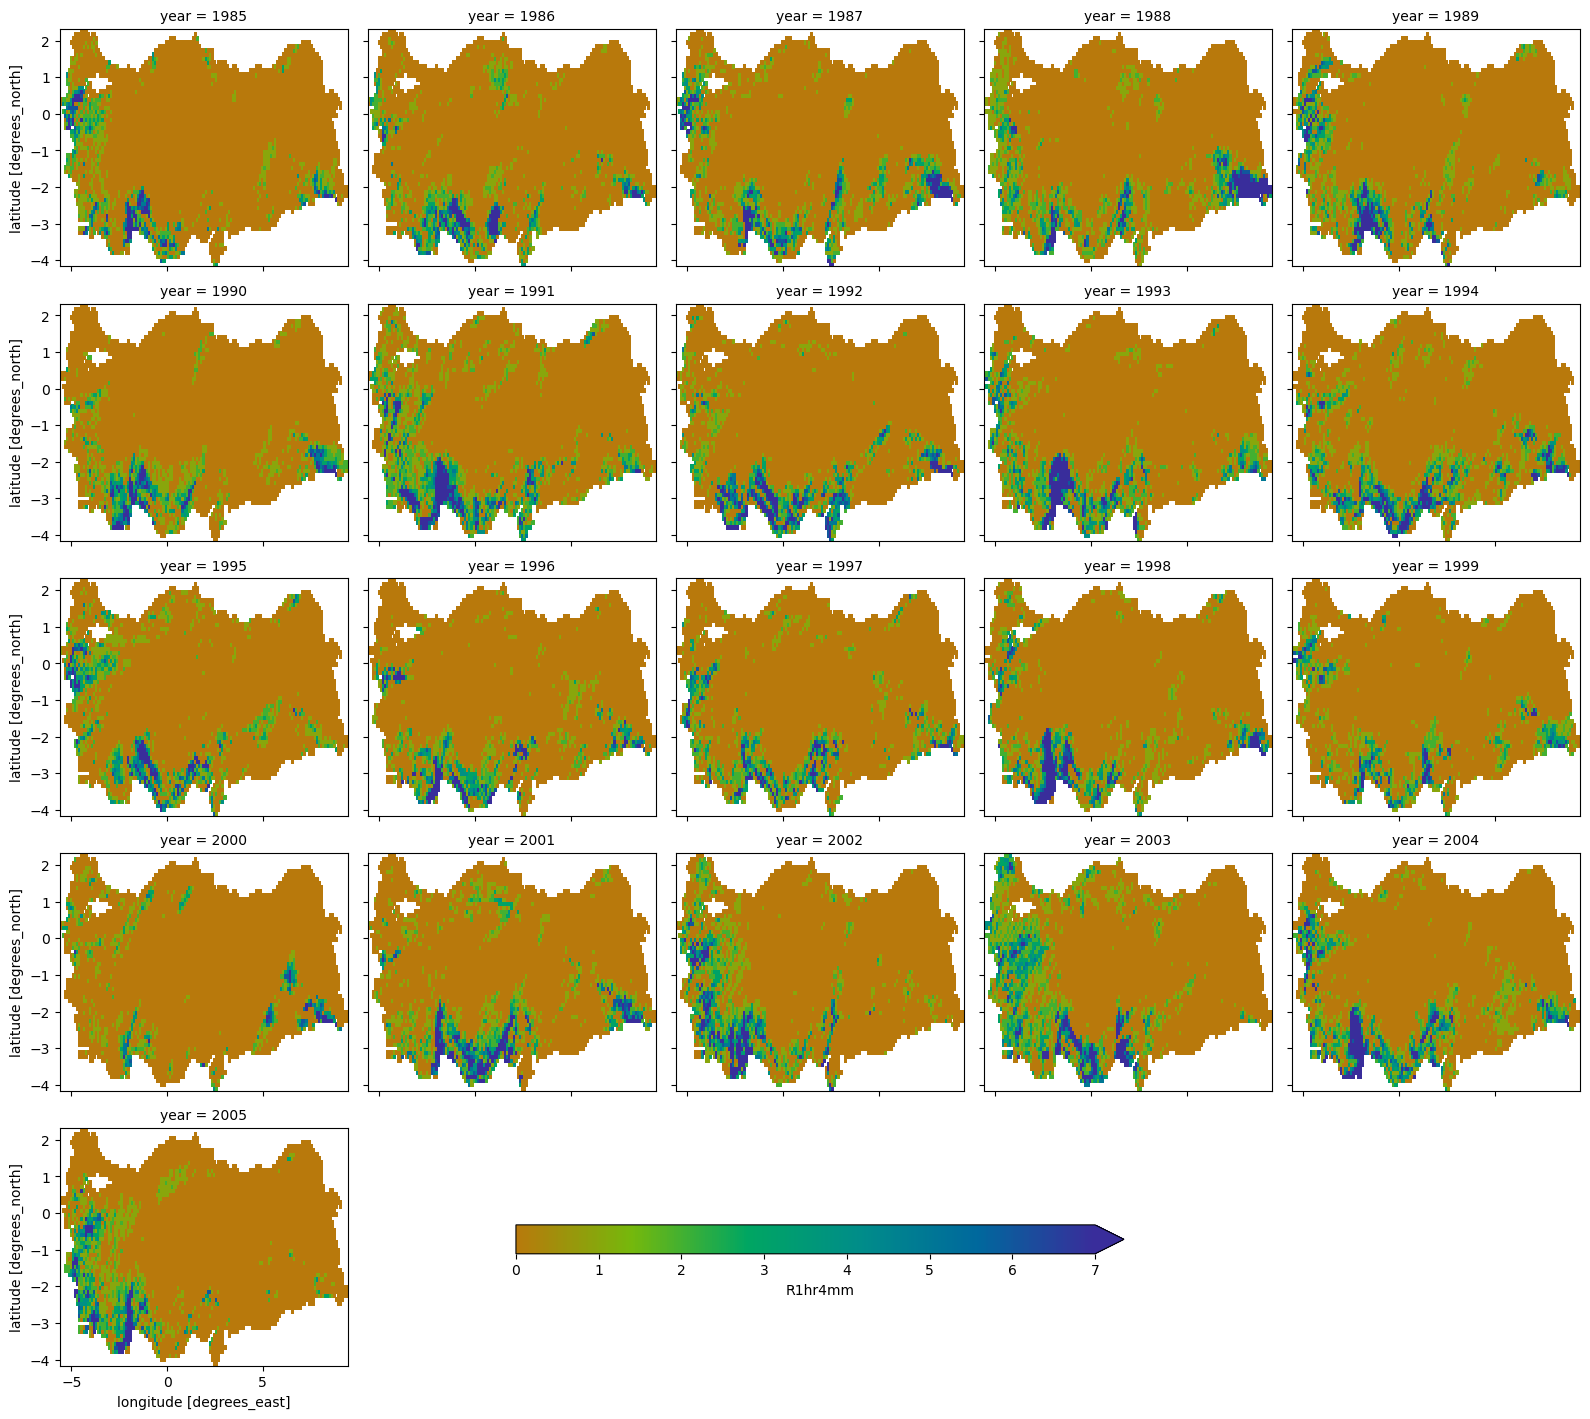

In [11]:
plot_indices(intensity_idx_cosmo, cmap_absolute, indice_name, time_frame)

##### 2.3.2.2 JJA

In [16]:
# uique options
season, time_resample, path_resample = return_unique_options('JJA', 1)
heavy_rain = 4 * time_resample # 4mm times the resample period
indice_name = fr'R{time_resample}hr{heavy_rain}mm'
time_frame = '208101_210012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
intensity_idx_cosmo = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

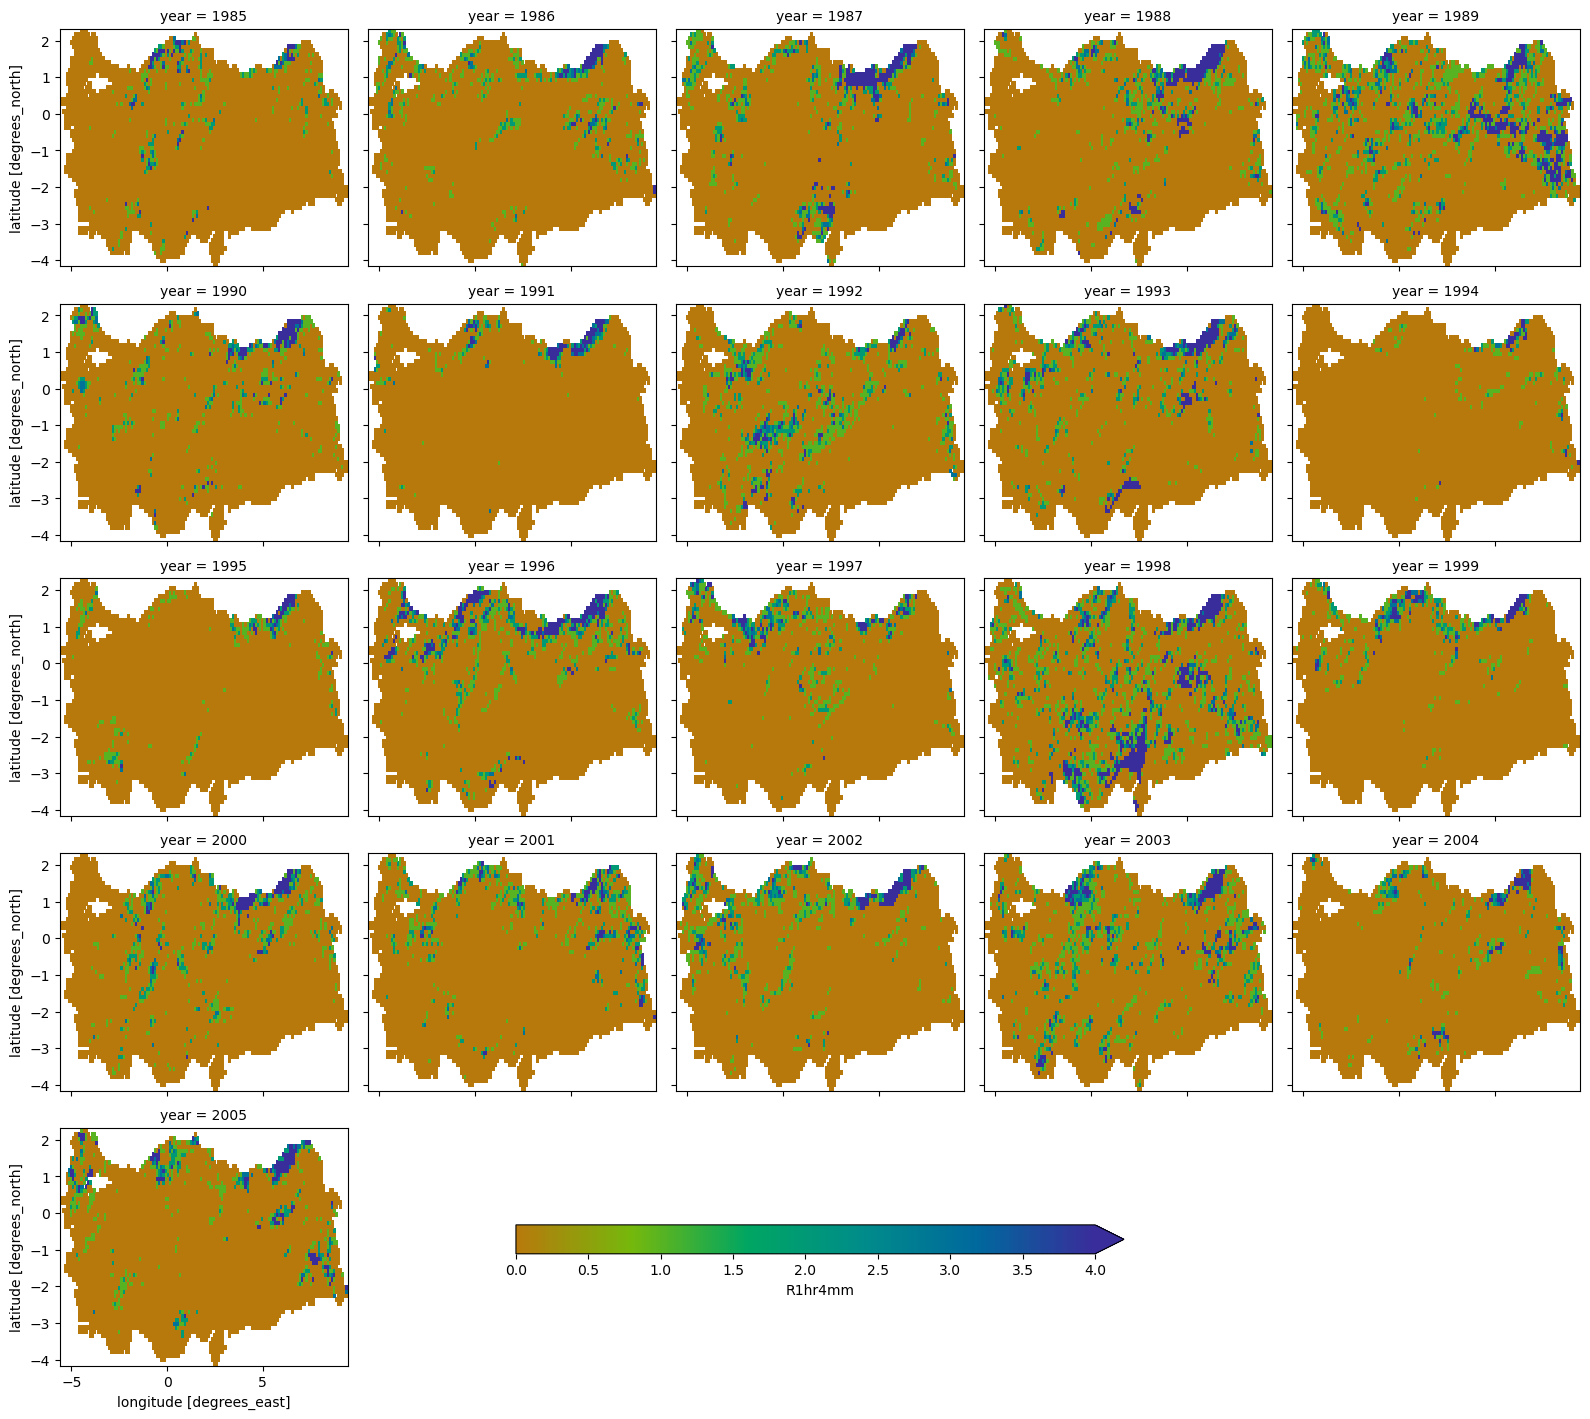

In [17]:
plot_indices(intensity_idx_cosmo, cmap_absolute, indice_name, time_frame)

### 2.4 Persistence - Percentile Indices

#### 2.4.1 Reference

In [35]:
cmap_absolute = matplotlib.colors.LinearSegmentedColormap.from_list('Random gradient 1050', (
    # Edit this gradient at https://eltos.github.io/gradient/#Random%20gradient%201050=823214-895100-857000-718E00-2FAD11-1082AD
    (0.000, (0.510, 0.196, 0.078)),
    (0.200, (0.537, 0.318, 0.000)),
    (0.400, (0.522, 0.439, 0.000)),
    (0.600, (0.443, 0.557, 0.000)),
    (0.800, (0.184, 0.678, 0.067)),
    (1.000, (0.063, 0.510, 0.678))))

##### 2.4.1.1 DJF

In [38]:
# uique options
season, time_resample, path_resample = return_unique_options('DJF', 1)
heavy_rain = 4 * time_resample # 4mm times the resample period
indice_name = fr'M{time_resample}hrCW0.95P'
time_frame = '198501_200512' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
intensity_idx_cosmo = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

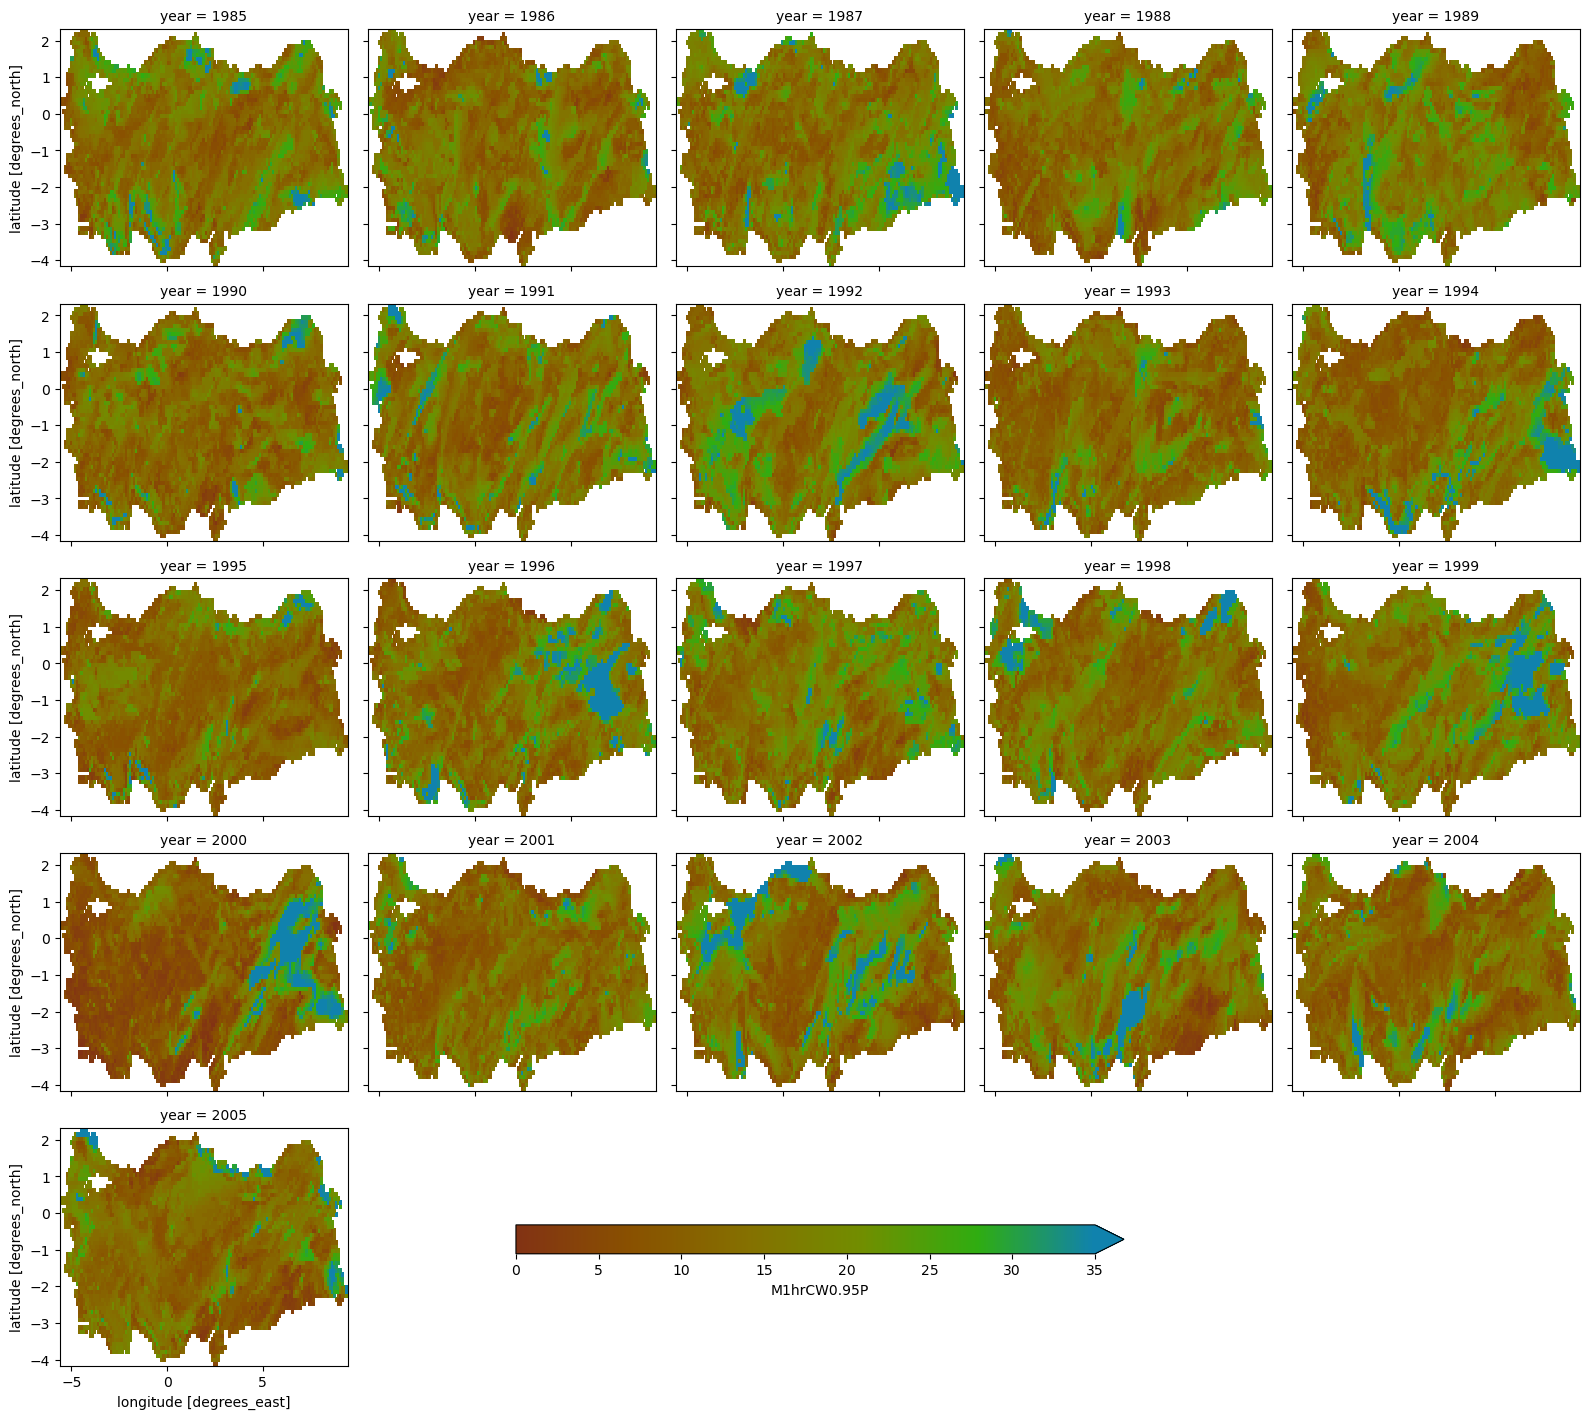

In [39]:
plot_indices(intensity_idx_cosmo, cmap_absolute, indice_name, time_frame)

##### 2.4.1.2 JJA

In [40]:
# uique options
season, time_resample, path_resample = return_unique_options('JJA', 1)
heavy_rain = 4 * time_resample # 4mm times the resample period
indice_name = fr'M{time_resample}hrCW0.95P'
time_frame = '198501_200512' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
intensity_idx_cosmo = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

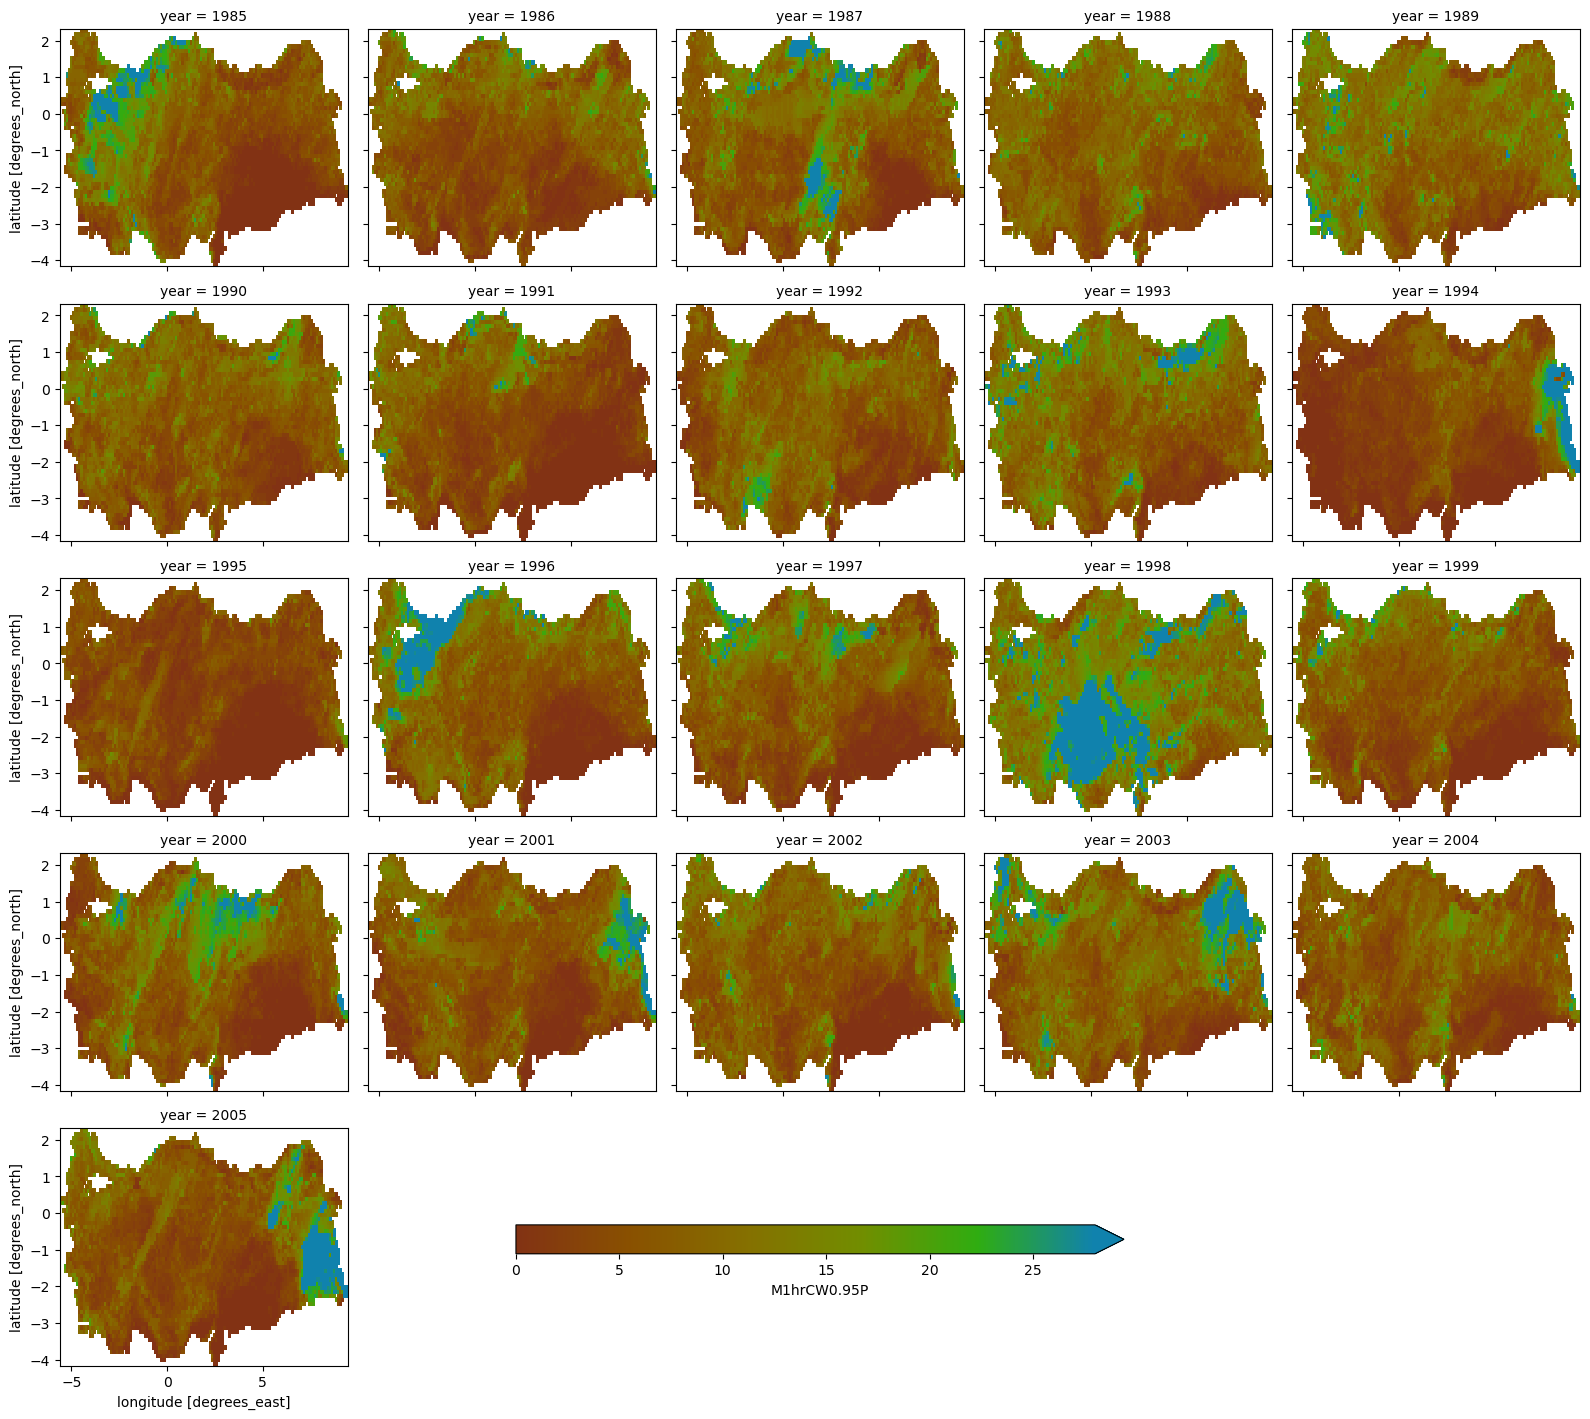

In [41]:
plot_indices(intensity_idx_cosmo, cmap_absolute, indice_name, time_frame)

#### 2.4.2 Projection

In [42]:
cmap_absolute = matplotlib.colors.LinearSegmentedColormap.from_list('Random gradient 1050', (
    # Edit this gradient at https://eltos.github.io/gradient/#Random%20gradient%201050=823214-895100-857000-718E00-2FAD11-1082AD
    (0.000, (0.510, 0.196, 0.078)),
    (0.200, (0.537, 0.318, 0.000)),
    (0.400, (0.522, 0.439, 0.000)),
    (0.600, (0.443, 0.557, 0.000)),
    (0.800, (0.184, 0.678, 0.067)),
    (1.000, (0.063, 0.510, 0.678))))

##### 2.4.2.1 DJF

In [43]:
# uique options
season, time_resample, path_resample = return_unique_options('DJF', 1)
heavy_rain = 4 * time_resample # 4mm times the resample period
indice_name = fr'M{time_resample}hrCW0.95P'
time_frame = '208101_210012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
intensity_idx_cosmo = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

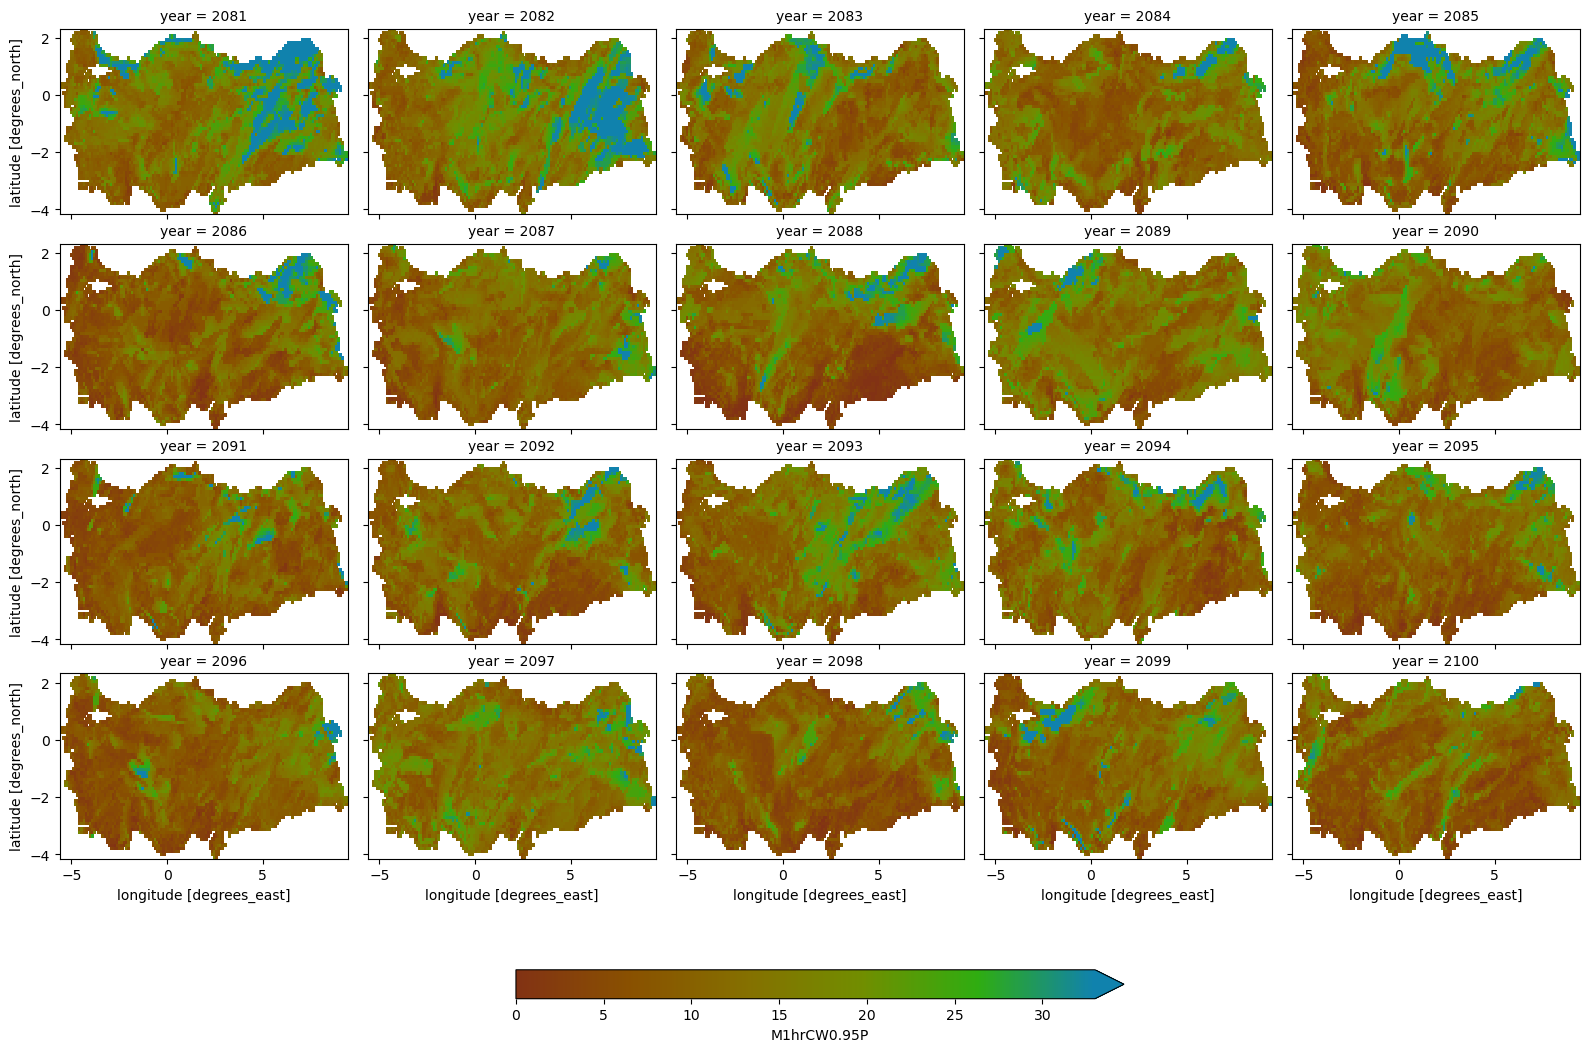

In [44]:
plot_indices(intensity_idx_cosmo, cmap_absolute, indice_name, time_frame)

##### 2.4.2.2 JJA

In [45]:
# uique options
season, time_resample, path_resample = return_unique_options('JJA', 1)
heavy_rain = 4 * time_resample # 4mm times the resample period
indice_name = fr'M{time_resample}hrCW0.95P'
time_frame = '208101_210012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
intensity_idx_cosmo = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

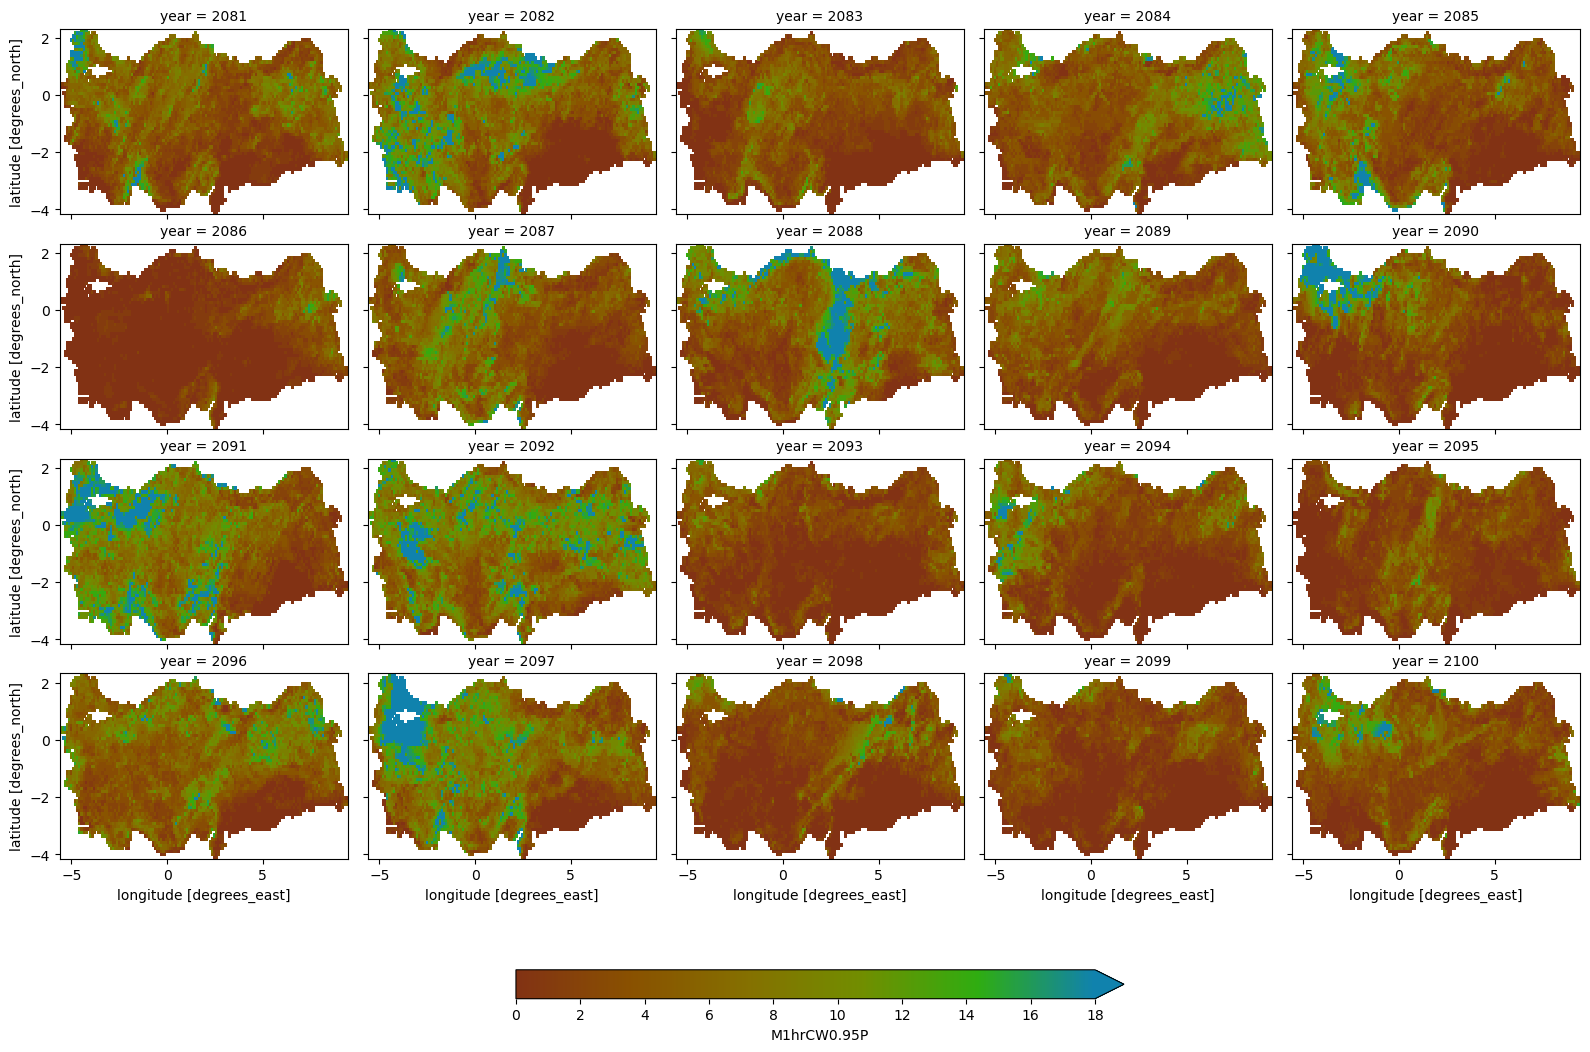

In [46]:
plot_indices(intensity_idx_cosmo, cmap_absolute, indice_name, time_frame)

### 2.5 Persistence - Absolute Indices

#### 2.5.1 Reference

In [36]:
cmap_absolute = matplotlib.colors.LinearSegmentedColormap.from_list('Random gradient 1050', (
    # Edit this gradient at https://eltos.github.io/gradient/#Random%20gradient%201050=823214-895100-857000-718E00-2FAD11-1082AD
    (0.000, (0.510, 0.196, 0.078)),
    (0.200, (0.537, 0.318, 0.000)),
    (0.400, (0.522, 0.439, 0.000)),
    (0.600, (0.443, 0.557, 0.000)),
    (0.800, (0.184, 0.678, 0.067)),
    (1.000, (0.063, 0.510, 0.678))))

##### 2.5.1.1 DJF

In [27]:
# uique options
season, time_resample, path_resample = return_unique_options('DJF', 1)
heavy_rain = 4 * time_resample # 4mm times the resample period
indice_name = fr'M{time_resample}hrCW{heavy_rain}mm'
time_frame = '198501_200512' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
intensity_idx_cosmo = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

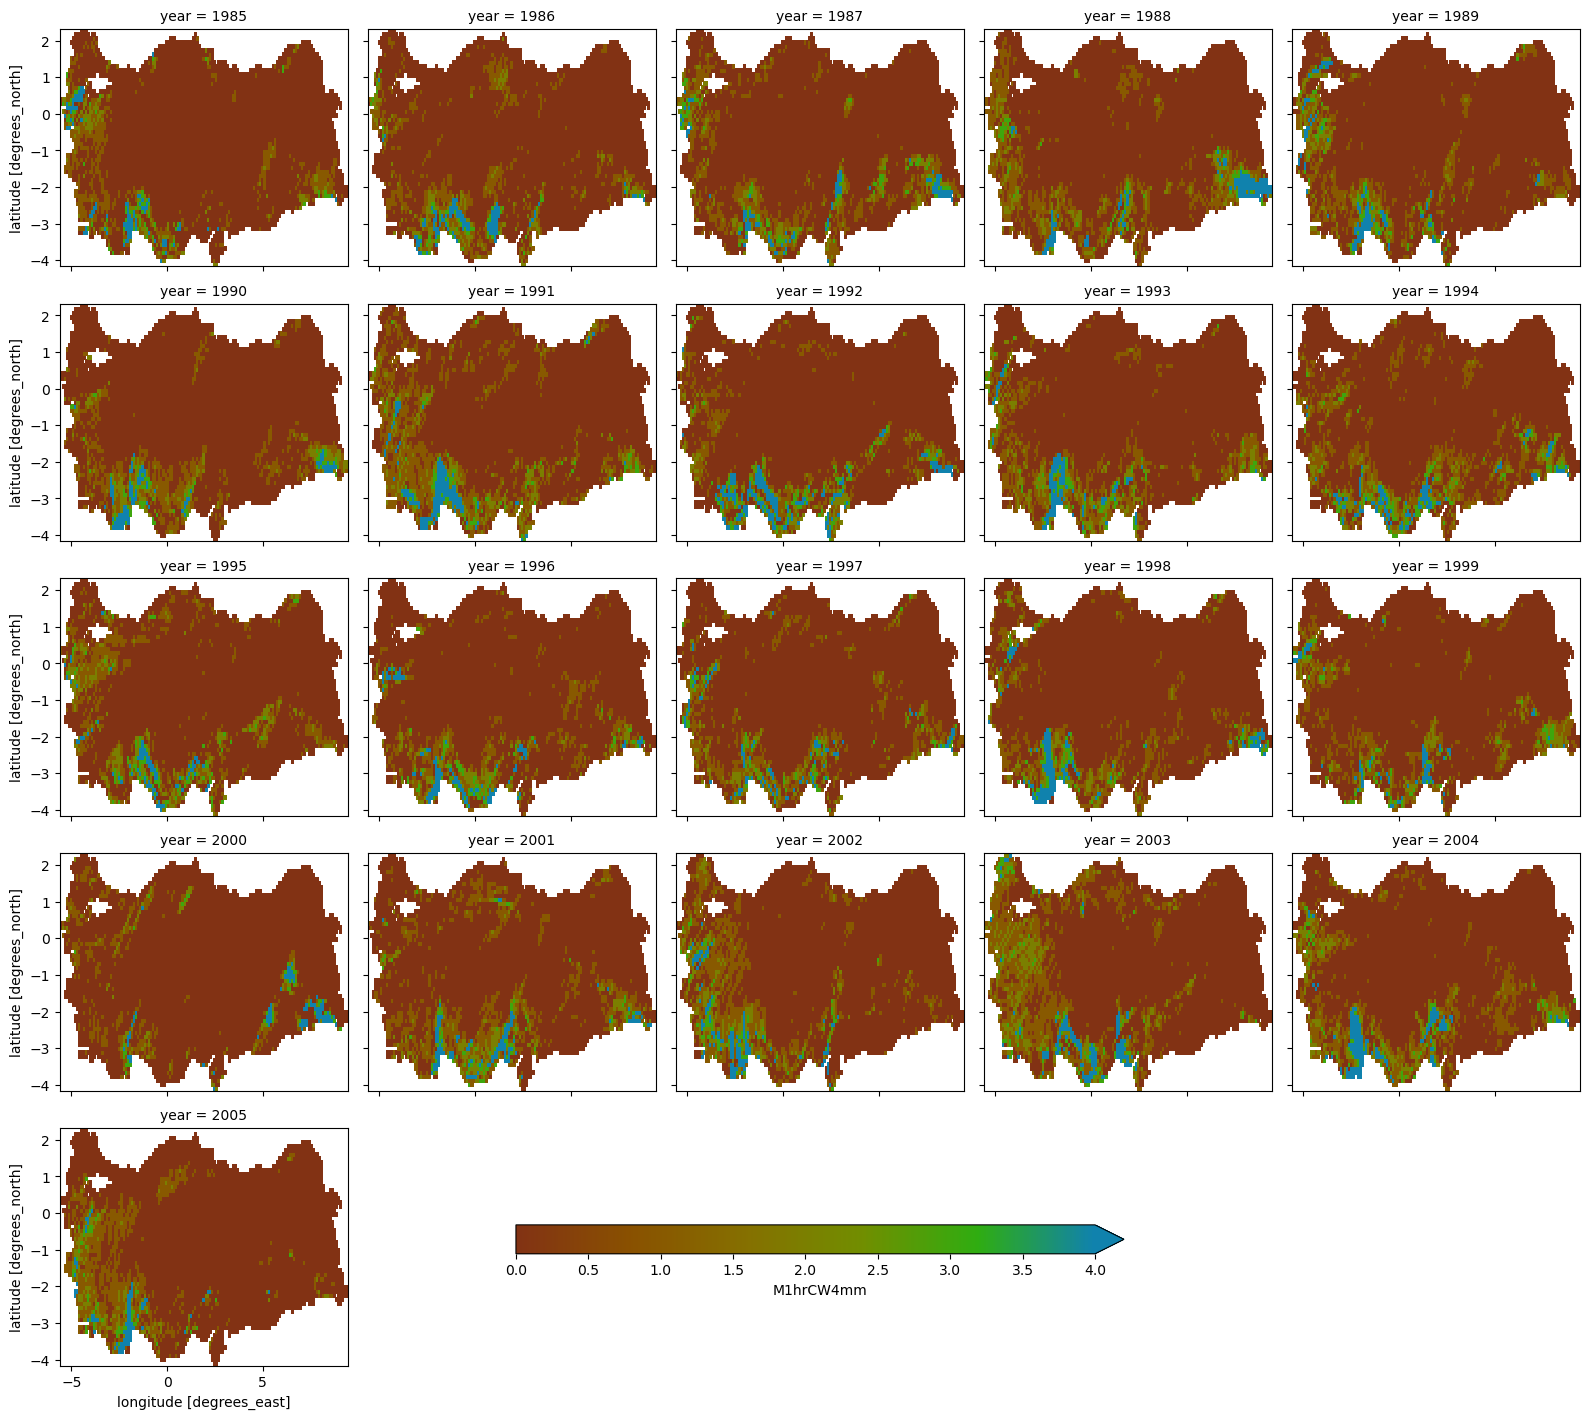

In [28]:
plot_indices(intensity_idx_cosmo, cmap_absolute, indice_name, time_frame)

##### 2.5.1.2 JJA

In [33]:
# uique options
season, time_resample, path_resample = return_unique_options('JJA', 1)
heavy_rain = 4 * time_resample # 4mm times the resample period
indice_name = fr'M{time_resample}hrCW{heavy_rain}mm'
time_frame = '198501_200512' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
intensity_idx_cosmo = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

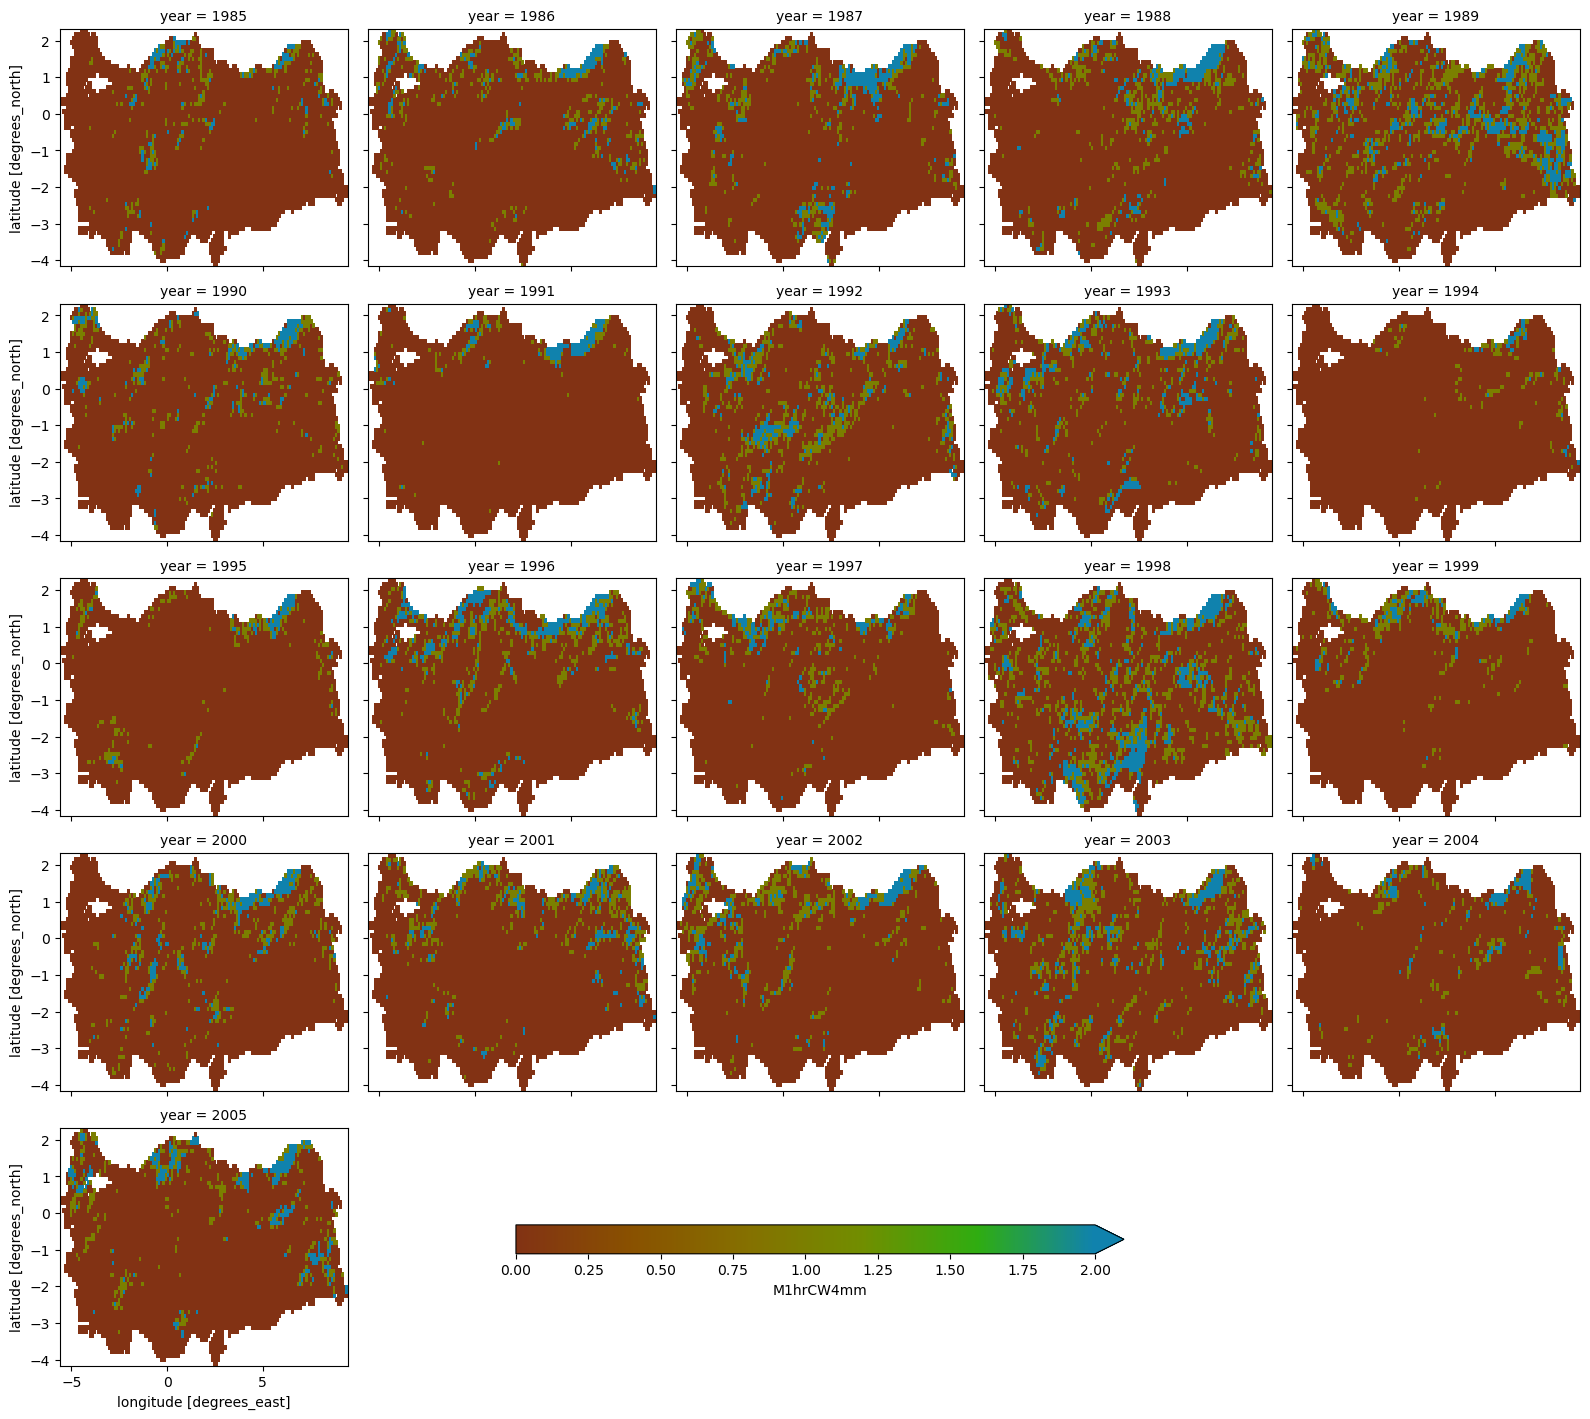

In [34]:
plot_indices(intensity_idx_cosmo, cmap_absolute, indice_name, time_frame)

#### 2.5.2 Projection

In [36]:
cmap_absolute = matplotlib.colors.LinearSegmentedColormap.from_list('Random gradient 1050', (
    # Edit this gradient at https://eltos.github.io/gradient/#Random%20gradient%201050=823214-895100-857000-718E00-2FAD11-1082AD
    (0.000, (0.510, 0.196, 0.078)),
    (0.200, (0.537, 0.318, 0.000)),
    (0.400, (0.522, 0.439, 0.000)),
    (0.600, (0.443, 0.557, 0.000)),
    (0.800, (0.184, 0.678, 0.067)),
    (1.000, (0.063, 0.510, 0.678))))

##### 2.5.2.1 DJF

In [27]:
# uique options
season, time_resample, path_resample = return_unique_options('DJF', 1)
heavy_rain = 4 * time_resample # 4mm times the resample period
indice_name = fr'M{time_resample}hrCW{heavy_rain}mm'
time_frame = '208101_210012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
intensity_idx_cosmo = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

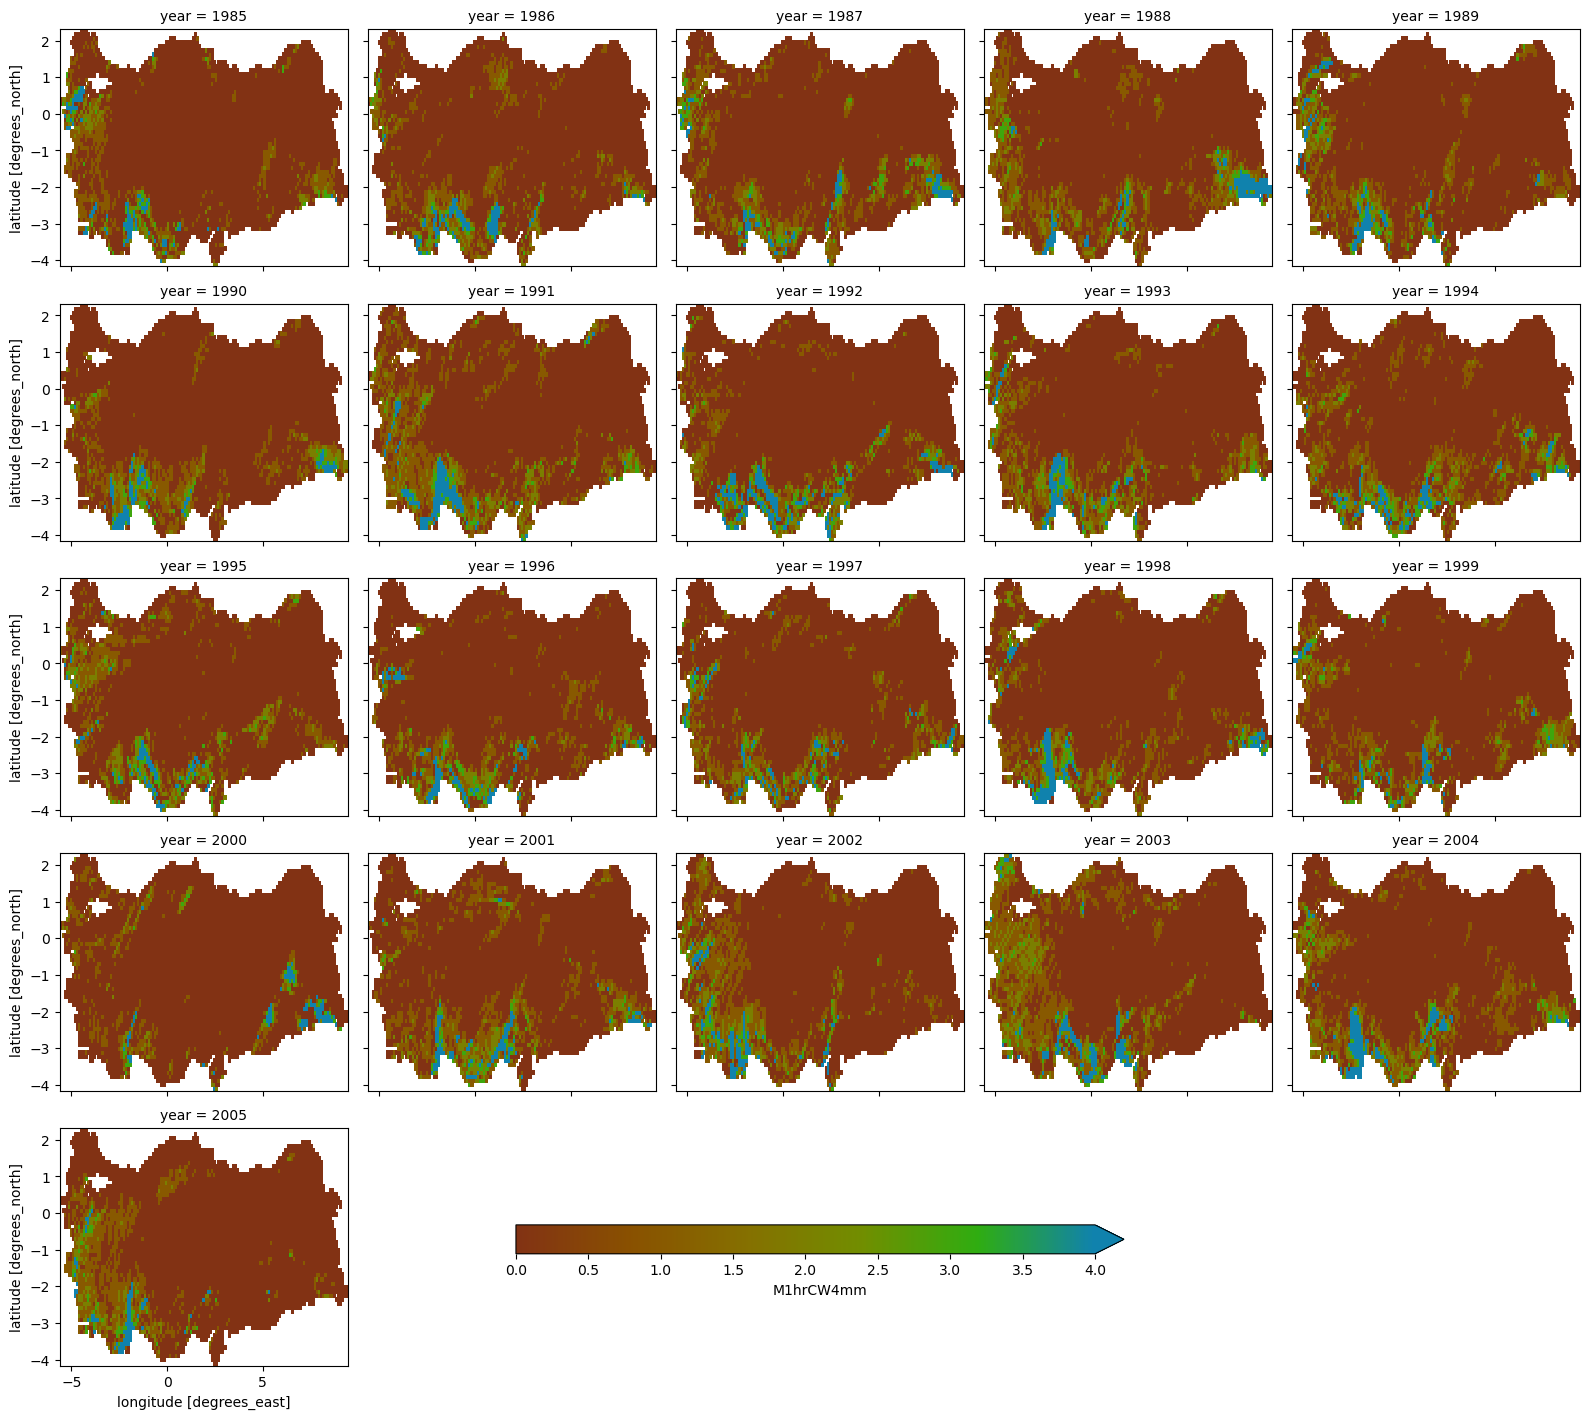

In [28]:
plot_indices(intensity_idx_cosmo, cmap_absolute, indice_name, time_frame)

##### 2.5.2.2 JJA

In [33]:
# uique options
season, time_resample, path_resample = return_unique_options('JJA', 1)
heavy_rain = 4 * time_resample # 4mm times the resample period
indice_name = fr'M{time_resample}hrCW{heavy_rain}mm'
time_frame = '208101_210012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_{time_frame}.nc"
intensity_idx_cosmo = xr.open_dataset(path).where(turkey_bool==1)[name_variable_cosmo]

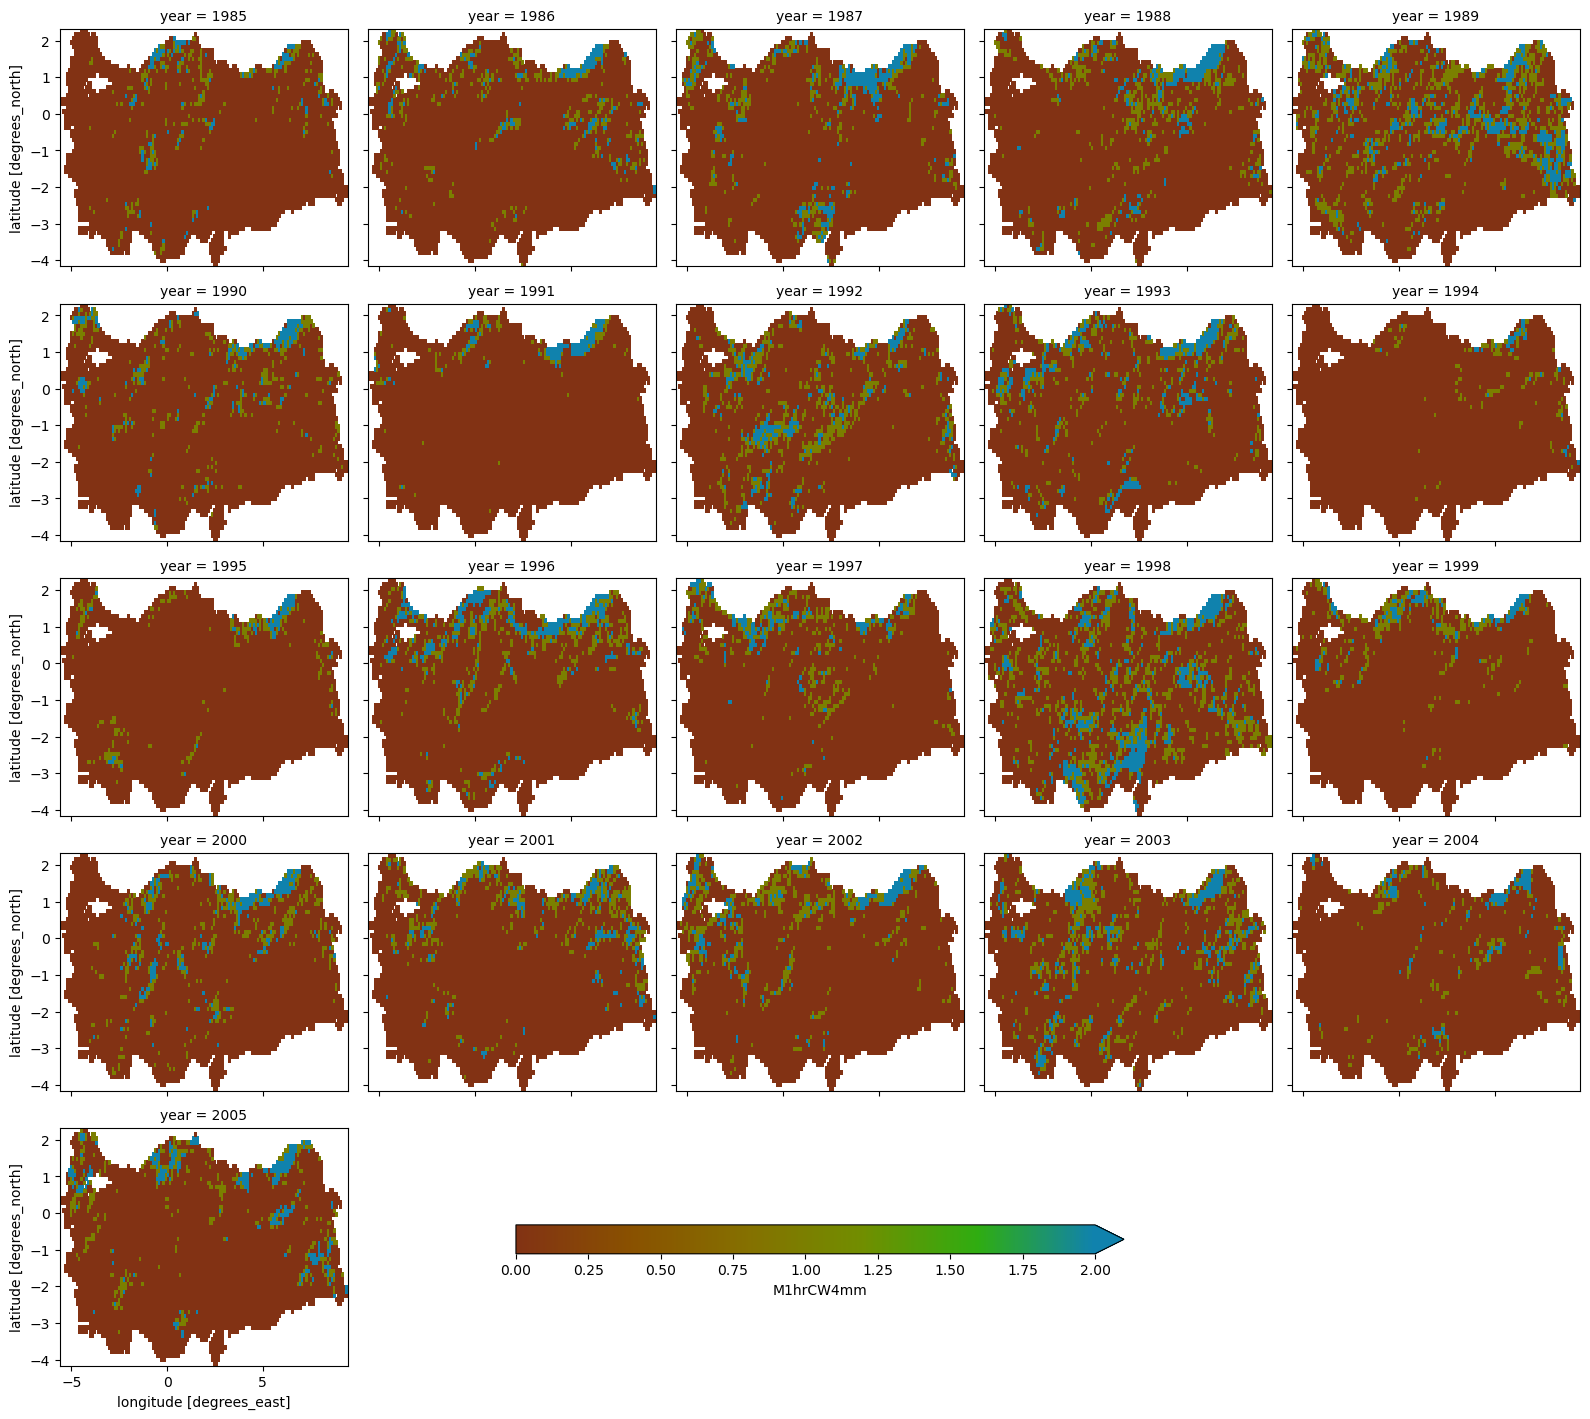

In [34]:
plot_indices(intensity_idx_cosmo, cmap_absolute, indice_name, time_frame)